In [1]:
import uproot3 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import tensorflow as tf

import vector
import awkward as ak  # at least version 1.2.0


2022-09-06 23:11:50.459310: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-06 23:11:50.517013: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-06 23:11:50.517037: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data Loading

In [2]:
# loading the tree
# tree = uproot3.open("/eos/user/q/qintong/SWAN_projects/Masters2021/MVAFILE_GluGluHToTauTauUncorrelatedDecay_Filtered_tt_2018.root")["ntuple"]
# tree2 = uproot3.open("/eos/user/q/qintong/SWAN_projects/Masters2021/MVAFILE_VBFHToTauTauUncorrelatedDecay_Filtered_tt_2018.root")["ntuple"]

#tree = uproot3.open("/eos/user/q/qintong/SWAN_projects/Masters2021/Reco_data/DY1JetsToLL-LO_2018_tt_0.root")["ntuple"]
#tree2 = uproot3.open("/home/ql1821/Desktop/Research_Project/data/SV_GluGluHToTauTau_M-125_tt_2018.root")["ntuple"]
tree2 = uproot3.open("/home/ql1821/Desktop/Research_Project/data/GluGluHToTauTauUncorrelatedDecay_Filtered_tt_2018_7.root")["ntuple"]

In [3]:
# define what variables are to be read into the dataframe

variables = [ 
            'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_1',
            'pi2_px_1', 'pi2_py_1', 'pi2_pz_1', 'pi2_E_1',
            'pi3_px_1', 'pi3_py_1', 'pi3_pz_1', 'pi3_E_1', 
            'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2', 
            'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2', 
            'pi3_px_2', 'pi3_py_2', 'pi3_pz_2', 'pi3_E_2', 
            'pi0_px_1', 'pi0_py_1', 'pi0_pz_1', 'pi0_E_1', 
            'pi0_px_2', 'pi0_py_2', 'pi0_pz_2', 'pi0_E_2', 
            'phi_1','phi_2',
            'tau_decay_mode_1','tau_decay_mode_2',
            'gen_nu_p_1','gen_nu_px_1','gen_nu_py_1','gen_nu_pz_1','gen_nu_E_1',
            'gen_nu_p_2','gen_nu_px_2','gen_nu_py_2','gen_nu_pz_2','gen_nu_E_2',
            'gen_vis_p_1','gen_vis_px_1','gen_vis_py_1','gen_vis_pz_1','gen_vis_E_1',
            'gen_vis_phi_1','gen_vis_eta_1',
            'gen_vis_p_2','gen_vis_px_2','gen_vis_py_2','gen_vis_pz_2','gen_vis_E_2',
            'gen_vis_phi_2','gen_vis_eta_2',
            'met','m_sv',
            'aco_angle_1','aco_angle_2',
            'lead_pt_1','pt_vis','pt_1','pt_2',
            'eta_1','eta_2',
            'metx','mety',
            'ip_x_1','ip_y_1','ip_z_1',
            'ip_x_2','ip_y_2','ip_z_2',
            'sv_x_1','sv_y_1','sv_z_1',
            'sv_x_2','sv_y_2','sv_z_2',
            'Px_h','Py_h','Pz_h',
            'pt_h','eta_h',
            'svfit_px_1','svfit_py_1','svfit_pz_1','svfit_E_1',
            'svfit_eta_1',
            'svfit_phi_1',
            'svfit_px_2','svfit_py_2','svfit_pz_2','svfit_E_2',
            'svfit_eta_2',
            'svfit_phi_2',
            'gen_match_1','gen_match_2',
            'gen_nu_eta_1','gen_nu_eta_2',
            'gen_nu_phi_1','gen_nu_phi_2',
            'tauFlag_1','tauFlag_2',
            'pv_angle','pv_angle_new','aco_angle_6','aco_angle_5','aco_angle_7',
            'wt_cp_sm', 'wt_cp_ps', 'wt_cp_mm','rand',
             ]

#df1 = tree.pandas.df(variables)

df2 = tree2.pandas.df(variables)

#combine VBF and ggH events

#df = pd.concat([df1,df2], ignore_index=True)
#print('{0}\n{1}\n{2}\n{3}'.format(A,B,C,D))
#df1['dm_1'],df1['dm_2'] = df1["tau_decay_mode_1"],df1["tau_decay_mode_2"]
df2['dm_1'],df2['dm_2'] = df2["tau_decay_mode_1"],df2["tau_decay_mode_2"]

In [4]:
df2

,pi_px_1,pi_py_1,pi_pz_1,pi_E_1,pi2_px_1,pi2_py_1,pi2_pz_1,pi2_E_1,pi3_px_1,pi3_py_1,...,pv_angle_new,aco_angle_6,aco_angle_5,aco_angle_7,wt_cp_sm,wt_cp_ps,wt_cp_mm,rand,dm_1,dm_2
entry,,,,,,,,,,,,,,,,,,,,,
0,-18.843747,0.010897,-3.417199,19.151596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.409130,-9999.000000,-9999.000000,-9999.000000,1.961165,1.601621,1.674211,0.195390,1,10
1,-15.508304,11.613920,-7.895206,20.922342,-4.750827,3.951984,-2.292330,6.592631,-5.296263,4.146835,...,0.077197,-9999.000000,3.269530,-9999.000000,0.875986,0.850253,1.636453,0.462362,11,0
2,48.772534,12.352636,-117.169222,127.514681,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.345885,-9999.000000,-9999.000000,-9999.000000,0.000029,1.991802,1.003358,0.698052,1,10
3,-49.683652,22.702982,54.239112,76.979162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.015646,-9999.000000,3.438008,-9999.000000,0.030128,1.777164,0.822468,0.915994,0,11
4,5.249920,-12.394966,-22.458754,26.184192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9999.000000,6.004067,4.022714,1.626069,0.729696,0.851171,0.421835,0.424206,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423618,-1.711885,33.581395,-73.949254,81.235166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9999.000000,2.855022,3.299596,2.224475,1.000000,1.000000,1.000000,0.762297,1,1
1423619,22.682722,12.961857,20.368293,33.127065,27.452563,16.563837,25.183824,40.770680,1.387748,0.852931,...,2.080778,-9999.000000,-9999.000000,-9999.000000,1.533341,1.022219,1.171455,0.717397,10,10
1423620,26.887977,-1.632670,3.169032,27.123627,11.635599,-1.013873,1.842546,11.824954,1.878972,-0.159650,...,2.442124,-9999.000000,-9999.000000,-9999.000000,0.186486,1.239503,1.110007,0.405491,11,10


### Preselection of data

* Select all hadronic decays, i.e. when dm = 0, 1, 10 in this sample. This means that at least one set of pion momentum is not 0.
* In this case, dm = 11 is also included. However, this channel is not considered in the analysis.

Therefore, the preselection will ignore all the events when all $\pi$ momentum components are zeros as well as when the dm == 11.

In [5]:
df_products = df2.iloc[:,0:32]
df_select = df2.loc[(df_products != 0).any(axis=1)]
df_select = df_select[(df_select['dm_1']<11)&(df_select['dm_2']<11)]
# df_select = df_select[(df_select['gen_nu_py_2']!=-9999)&(df_select['gen_nu_py_2']!=-9999)]
# df_select = df_select[(df_select['gen_nu_py_1']!=-9999)&(df_select['gen_nu_py_1']!=-9999)]

df_select = df_select[(df_select['gen_match_1']==5)&(df_select['gen_match_2']==5)]
l = df_select.index.to_numpy()

a = []
b = []
c = []

for i in l:
    a.append(df2['dm_1'][i]) 
    b.append(df2['dm_2'][i])

# df_select['tau_1'],df_select['tau_2']= [a,b]
# df_select['tau_2'] = b
# df_select['mass'] = c

In [6]:
var_test = ['gen_vis_px_1','gen_vis_py_1','gen_vis_pz_1','gen_vis_E_1',
           'gen_nu_px_1','gen_nu_py_1','gen_nu_pz_1','gen_nu_E_1']

### Plot acoangle distribution computed by different methods

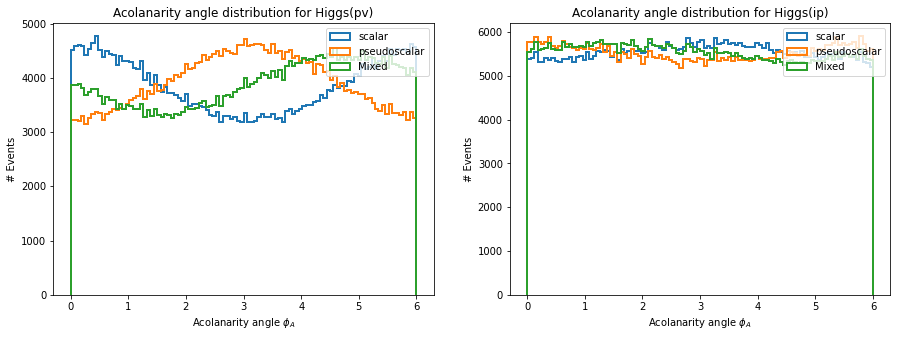

In [7]:
f, axs = plt.subplots(figsize=(15,5))
r = (0.,6.)
bins = 100
plt.subplot(1,2,1)
plt.hist(df_select['pv_angle'].to_numpy(),bins = bins, range = r,label = 'scalar',weights=df_select['wt_cp_sm'],histtype = u'step',lw = 2)#,density=True)
plt.hist(df_select['pv_angle'].to_numpy(),bins = bins, range = r,label = 'pseudoscalar',weights=df_select['wt_cp_ps'],histtype = u'step',lw = 2)#,density=True)
plt.hist(df_select['pv_angle'].to_numpy(),bins = bins, range = r,label = 'Mixed',weights=df_select['wt_cp_mm'],histtype = u'step',lw = 2)
#n,bin,patches = plt.hist(df1['pv_angle'].to_numpy(),bins = 10, range = (0.,6.),alpha=0.5,label = 'Drell-Yan')
plt.title('Acolanarity angle distribution for Higgs(pv)')
plt.xlabel('Acolanarity angle $\phi_A$')
plt.ylabel('# Events')
plt.legend()

plt.subplot(1,2,2)
plt.hist(df_select['aco_angle_1'].to_numpy(),bins = bins, range = r,label = 'scalar',weights=df_select['wt_cp_sm'],histtype = u'step',lw = 2)#,density=True)
plt.hist(df_select['aco_angle_1'].to_numpy(),bins = bins, range = r,label = 'pseudoscalar',weights=df_select['wt_cp_ps'],histtype = u'step',lw = 2)#,density=True)
plt.hist(df_select['aco_angle_1'].to_numpy(),bins = bins, range = r,label = 'Mixed',weights=df_select['wt_cp_mm'],histtype = u'step',lw = 2)
#n,bin,patches = plt.hist(df1['pv_angle'].to_numpy(),bins = 10, range = (0.,6.),alpha=0.5,label = 'Drell-Yan')
plt.title('Acolanarity angle distribution for Higgs(ip)')
plt.xlabel('Acolanarity angle $\phi_A$')
plt.ylabel('# Events')
plt.legend()

In [8]:
df_select[(df_select['dm_1']==0)&(df_select['dm_2']==0)]

,pi_px_1,pi_py_1,pi_pz_1,pi_E_1,pi2_px_1,pi2_py_1,pi2_pz_1,pi2_E_1,pi3_px_1,pi3_py_1,...,pv_angle_new,aco_angle_6,aco_angle_5,aco_angle_7,wt_cp_sm,wt_cp_ps,wt_cp_mm,rand,dm_1,dm_2
entry,,,,,,,,,,,,,,,,,,,,,
5,-52.894818,-16.907334,9.244566,56.295659,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,6.196290,-9999.0,-9999.0,0.371561,0.635255,0.968101,0.775710,0,0
46,-88.468450,57.247043,86.529880,136.350028,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.000000,-9999.0,-9999.0,1.016318,0.595074,1.239614,0.412534,0,0
51,65.281588,7.834331,15.712989,67.601627,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,5.660508,-9999.0,-9999.0,1.161254,1.223953,0.674948,0.604543,0,0
62,-57.391367,31.696568,86.227246,108.321645,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.000000,-9999.0,-9999.0,0.563526,1.028762,1.473202,0.983698,0,0
84,-34.119216,40.229860,37.050981,64.462060,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,2.190271,-9999.0,-9999.0,0.722537,1.599963,0.541459,0.735214,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423592,44.315293,-48.656345,60.447001,89.359636,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,1.357225,-9999.0,-9999.0,0.097263,0.666276,0.498995,0.590517,0,0
1423600,50.962350,-11.528285,-13.610965,53.993892,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,5.751649,-9999.0,-9999.0,0.776801,0.371662,0.119755,0.916029,0,0
1423603,22.759879,-94.484909,-241.830448,260.628831,0.0,0.0,0.0,0.0,0.0,0.0,...,-9999.0,-9999.000000,-9999.0,-9999.0,1.346706,0.359034,1.517512,0.292972,0,0


# Multi-output NN Regressor with customized loss function

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras import Input, Model
#from keras.layers.normalization import BatchNormalization

In [10]:
var_1 = ['reco_x_1','reco_y_1','reco_z_1','reco_E_1',
         'gen_nu_px_1','gen_nu_py_1','gen_nu_pz_1','gen_nu_E_1',
         'gen_vis_px_1','gen_vis_py_1','gen_vis_pz_1','gen_vis_E_1']


var_2 = ['reco_x_2','reco_y_2','reco_z_2','reco_E_2',
         'gen_nu_px_2','gen_nu_py_2','gen_nu_pz_2','gen_nu_E_2',
         'gen_vis_px_2','gen_vis_py_2','gen_vis_pz_2','gen_vis_E_2']

## Load useful inputs/output targets

In [11]:
df = pd.read_pickle('./df_it.pkl')

In [12]:
df['aco_angle_5'],df['aco_angle_1'], df['aco_angle_6']= df_select['aco_angle_5'],df_select['aco_angle_1'],df_select['aco_angle_6']

In [13]:
pd.set_option('display.max_columns', None)
df.columns.values

array(['met', 'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_1', 'pi2_px_1',
       'pi2_py_1', 'pi2_pz_1', 'pi2_E_1', 'pi3_px_1', 'pi3_py_1',
       'pi3_pz_1', 'pi3_E_1', 'pi0_px_1', 'pi0_py_1', 'pi0_pz_1',
       'pi0_E_1', 'metx', 'mety', 'ip_x_1', 'ip_y_1', 'ip_z_1', 'ip_x_2',
       'ip_y_2', 'ip_z_2', 'sv_x_1', 'sv_y_1', 'sv_z_1', 'sv_x_2',
       'sv_y_2', 'sv_z_2', 'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi_E_2',
       'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2', 'pi3_px_2',
       'pi3_py_2', 'pi3_pz_2', 'pi3_E_2', 'pi0_px_2', 'pi0_py_2',
       'pi0_pz_2', 'pi0_E_2', 'gen_nu_px_1', 'gen_nu_py_1', 'gen_nu_pz_1',
       'gen_nu_px_2', 'gen_nu_py_2', 'gen_nu_pz_2', 'gen_nu_eta_1',
       'gen_nu_eta_2', 'gen_nu_phi_1', 'gen_nu_phi_2', 'gen_vis_eta_1',
       'gen_vis_eta_2', 'gen_vis_phi_1', 'gen_vis_phi_2', 'gen_nu_E_1',
       'gen_nu_E_2', 'gen_delR_1', 'gen_delR_2', 'svfit_px_1',
       'svfit_py_1', 'svfit_pz_1', 'svfit_E_1', 'svfit_px_2',
       'svfit_py_2', 'svfit_pz_2', 'svfit_E_

In [14]:
y= df.filter(['gen_nu_px_1','gen_nu_py_1','gen_nu_pz_1','gen_delR_1','sca_gen_1','cross_mag_1',
              #'gen_nu_E_1',
              'gen_nu_px_2','gen_nu_py_2','gen_nu_pz_2','gen_delR_2','sca_gen_2','cross_mag_2'
              #'gen_nu_E_2',
#               'gen_nu_phi_1','gen_nu_eta_1',
#               'gen_nu_phi_2','gen_nu_eta_2',
#             'gen_px_1','gen_py_1','gen_pz_1',
#            'gen_px_2','gen_py_2','gen_pz_2'

             ])#.to_frame()
X=df.drop([
           #'gen_p','gen_px','gen_py','gen_pz',
           'gen_nu_px_1','gen_nu_py_1','gen_nu_pz_1','gen_delR_1','sca_gen_1','cross_mag_1',
    #'gen_nu_E_1',
           'gen_nu_px_2','gen_nu_py_2','gen_nu_py_2','gen_delR_2','sca_gen_2','cross_mag_2'
    #'gen_nu_E_2',
#            'gen_nu_phi_1','gen_nu_eta_1',
#            'gen_nu_phi_2','gen_nu_eta_2',
#            'gen_px_1','gen_py_1','gen_pz_1',
#            'gen_px_2','gen_py_2','gen_pz_2'
            ],axis=1)



In [15]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12345)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

StandardScaler()
StandardScaler()


In [17]:
X = pd.DataFrame(xscale,columns=X.columns)

y = pd.DataFrame(yscale,columns=y.columns)

In [18]:
X_train_o,X_test_o, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12345)
X_train = X_train_o.drop(['svfit_px_1','svfit_py_1','svfit_pz_1','svfit_E_1',
                          'svfit_eta_1',
                          'svfit_phi_1',
                          'svfit_px_2','svfit_py_2','svfit_pz_2','svfit_E_2',
                          'svfit_eta_2',
                          'svfit_phi_2',
                          'dm_1','dm_2',
                          'wt_cp_sm', 'wt_cp_ps', 'wt_cp_mm','pv_angle',
                          'aco_angle_6','aco_angle_5','aco_angle_1'],axis=1)
X_test = X_test_o.drop(['svfit_px_1','svfit_py_1','svfit_pz_1','svfit_E_1',
                        'svfit_eta_1',
                          'svfit_phi_1',
                          'svfit_px_2','svfit_py_2','svfit_pz_2','svfit_E_2',
                          'svfit_eta_2',
                          'svfit_phi_2',
                          'dm_1','dm_2',
                          'wt_cp_sm', 'wt_cp_ps', 'wt_cp_mm','pv_angle',
                          'aco_angle_6','aco_angle_5','aco_angle_1'],axis=1)

In [19]:
X_test_inv_o = pd.DataFrame(scaler_x.inverse_transform(X_test_o),columns=X_test_o.columns)
y_test_inv = pd.DataFrame(scaler_y.inverse_transform(y_test),columns=y_test.columns)

In [20]:
X_test_inv_o[(X_test_inv_o['dm_1']==0)&(X_test_inv_o['dm_2']==1)]

,met,pi_px_1,pi_py_1,pi_pz_1,pi_E_1,pi2_px_1,pi2_py_1,pi2_pz_1,pi2_E_1,pi3_px_1,pi3_py_1,pi3_pz_1,pi3_E_1,pi0_px_1,pi0_py_1,pi0_pz_1,pi0_E_1,metx,mety,ip_x_1,ip_y_1,ip_z_1,ip_x_2,ip_y_2,ip_z_2,sv_x_1,sv_y_1,sv_z_1,sv_x_2,sv_y_2,sv_z_2,pi_px_2,pi_py_2,pi_pz_2,pi_E_2,pi2_px_2,pi2_py_2,pi2_pz_2,pi2_E_2,pi3_px_2,pi3_py_2,pi3_pz_2,pi3_E_2,pi0_px_2,pi0_py_2,pi0_pz_2,pi0_E_2,gen_nu_pz_2,gen_nu_eta_1,gen_nu_eta_2,gen_nu_phi_1,gen_nu_phi_2,gen_vis_eta_1,gen_vis_eta_2,gen_vis_phi_1,gen_vis_phi_2,gen_nu_E_1,gen_nu_E_2,svfit_px_1,svfit_py_1,svfit_pz_1,svfit_E_1,svfit_px_2,svfit_py_2,svfit_pz_2,svfit_E_2,svfit_eta_1,svfit_eta_2,svfit_phi_1,svfit_phi_2,reco_x_1,reco_y_1,reco_z_1,reco_E_1,reco_x_2,reco_y_2,reco_z_2,reco_E_2,reco_eta_1,reco_eta_2,reco_phi_1,reco_phi_2,pt_1,pt_2,dm_1,dm_2,wt_cp_sm,wt_cp_ps,wt_cp_mm,pv_angle,aco_angle_5,aco_angle_1,aco_angle_6
7,58.183502,-75.672851,-18.388454,82.847318,113.702301,-6.938894e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.758432,-0.373636,2.120189,2.782999,46.826285,34.534316,0.002050,0.002213,0.002265,-0.003144,0.001659,-0.000141,0.0,0.0,0.0,0.0,0.0,5.421011e-20,8.576979,20.953122,28.566466,36.450793,0.0,0.0,0.0,0.0,6.938894e-18,0.0,0.0,0.0,8.000766,18.951547,26.843966,33.819966,18.335897,0.982194,1.013174,-2.695790,1.184897,0.925729,1.066609,-2.903309,1.184249,1.376877,23.903756,-79.977349,-18.464226,90.246862,95.511725,23.265417,54.809887,74.658751,-9999.0,0.95,1.05,-2.914700,1.169371,-75.672851,-18.388454,82.847318,113.702301,16.577745,39.904669,55.410432,70.270759,0.927571,1.063978,-2.903867,1.178028,78.398296,43.156469,0.0,1.0,1.925033,1.996547,1.970730,-9999.0,0.917460,-9999.0,5.166688
9,21.218683,43.096647,21.487286,64.007125,80.099663,-6.938894e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.108957,1.262886,4.326580,5.477042,-16.012966,-13.921834,-0.002256,-0.000066,0.001548,0.006605,-0.000148,0.001765,0.0,0.0,0.0,0.0,0.0,5.421011e-20,-33.075542,-12.279053,119.451653,124.553135,0.0,0.0,0.0,0.0,6.938894e-18,0.0,0.0,0.0,-12.001854,-4.138239,43.146721,44.975852,39.194187,1.015175,1.948700,0.549728,-2.730489,1.096322,1.935122,0.462349,-2.794684,7.009648,40.818001,46.891526,23.892426,65.987456,224.306359,-58.402615,-22.418663,215.398987,-9999.0,1.05,1.95,0.471239,-2.775074,43.096647,21.487286,64.007125,80.099663,-45.077395,-16.417291,162.598374,169.528987,1.094674,1.934889,0.459571,-2.792310,50.677640,47.775294,0.0,1.0,0.927531,1.749236,1.031188,-9999.0,-9999.000000,-9999.0,-9999.000000
16,7.041851,44.589488,-30.181566,-37.771036,65.770819,-6.938894e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,6.992416,-0.832936,0.000066,-0.001322,0.001223,0.003789,-0.005945,-0.006659,0.0,0.0,0.0,0.0,0.0,5.421011e-20,-15.859813,31.200422,-37.600641,51.369521,0.0,0.0,0.0,0.0,6.938894e-18,0.0,0.0,0.0,-4.012287,8.271678,-10.309002,13.813501,-22.267676,-0.643069,-0.992077,-0.641041,2.028624,-0.662549,-0.939353,-0.571318,2.037720,9.146086,29.367334,57.978156,-40.596742,-49.314577,82.195378,-25.101981,49.265412,-60.792538,-9999.0,-0.65,-0.95,-0.610865,2.042035,44.589488,-30.181566,-37.771036,65.770819,-19.872100,39.472100,-47.909642,65.183022,-0.653965,-0.943253,-0.595014,2.043921,52.991225,43.889153,0.0,1.0,1.490294,0.406718,0.180041,-9999.0,-9999.000000,-9999.0,-9999.000000
18,19.983036,-18.634271,40.376152,-46.491504,64.334665,-6.938894e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.884255,2.085945,-2.332221,3.254309,10.035938,-17.280095,0.002047,-0.004689,-0.004944,0.001884,-0.000826,0.000385,0.0,0.0,0.0,0.0,0.0,5.421011e-20,-3.641528,-36.380705,-76.635111,84.910351,0.0,0.0,0.0,0.0,6.938894e-18,0.0,0.0,0.0,-1.215936,-9.220762,-19.086250,21.232148,-28.436817,-0.708726,-1.524138,1.790923,-1.648496,-0.913226,-1.480960,2.000019,-1.663357,0.768139,31.269311,-21.698908,46.533458,-56.451912,163.158051,-6.322950,-72.271648,-146.130838,-9999.0,-0.95,-1.45,2.007129,-1.658063,-18.634271,40.376152,-46.491504,64.334665,-4.857464,-45.601467,-95.721361,106.142499,-0.912628,-1.487052,2.001626,-1.674632,45.978892,45.458325,0.0,1.0,0.712254,1.

## set loss function

In [21]:
# define new loss function
import keras.backend as K

def custom_loss(y_true, y_pred):
    #print(y_pred)
    loss = K.square(y_pred - y_true)
    #print(loss)
    # multiplying the values with weights along batch dimension
    loss = loss * [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.9, 0.9, 0.3, 0.3, 0.5, 0.5]         # (batch_size, 2)
    #loss = replacenan(loss)
    # summing both loss values along batch dimension 
    loss = K.sum(loss, axis=1)        # (batch_size,)
    #print(loss)
    # calculate loss, using y_pred
        
    return loss

In [22]:
#hidden_units = [10, 10]
learning_rate = 0.0005
num_epochs = 400
batch_size = 1000

In [23]:
# num_classes = len(y_train.columns)
# num_classes

In [24]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=custom_loss,
        metrics=[tf.keras.metrics.TopKCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True,
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.1,
        validation_data=(X_test,[y_test]),
        #callbacks=[early_stopping],
    )

    return history

In [25]:
def create_model():
    model = Sequential()
    
    #model.add(Conv1D(filters=256, kernel_size=5,activation="relu", input_shape=(len(X_test.columns),1)))
    
    #model.add(MaxPooling1D(pool_size=4))
    
    model.add(Dense(len(X_test.columns), input_dim=len(X_test.columns), kernel_initializer='normal', activation='relu'))

    model.add(Dense((len(X_test.columns))*2, kernel_initializer='normal', activation='relu'))
    
    #model.add(Flatten())

    model.add(Dense((len(X_test.columns))*8, kernel_initializer='normal', activation='relu'))

    #model.add(Dense((len(X_test.columns))*3, kernel_initializer='normal', activation='relu'))
    
    model.add(Dense(12, activation='linear'))
    
    return model

In [26]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"],'o-')
    ax1.plot(history.history["val_loss"],'o-')
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"],'o-')
    ax2.plot(history.history["val_acc"],'o-')
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

In [27]:
# model = create_model()
# model.summary()

## > Train model

In [28]:
# history = run_experiment(model, X_train, [y_train])

In [29]:
# model.save('Downloads/Research_Project/model_1')

## > import saved model

In [30]:
from keras.models import load_model
from keras.utils.generic_utils import get_custom_objects

get_custom_objects().update({'custom_loss': custom_loss})

model = load_model('Downloads/Research_Project/model_1')

2022-09-06 23:12:24.477348: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-06 23:12:24.477381: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-06 23:12:24.477414: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ql1821-laptop): /proc/driver/nvidia/version does not exist
2022-09-06 23:12:24.479272: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
# display_learning_curves(history)

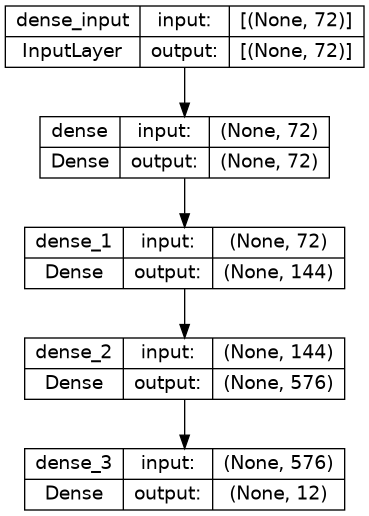

In [32]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [33]:
prediction = model.predict(X_test)

10700/10700 [==============================] - 6s 584us/step


In [34]:
#plot distributions also
data_true=pd.DataFrame(y_test)
data_pred=pd.DataFrame(prediction)
data_true.reset_index()
data_pred.reset_index()

# print(data_true[:10])
# print(data_pred[:10])
#data_pred.rename(columns={"0": "data_true"})#, "1": "Phigentau_1", "2": "Etagentau_1", "3": "Mgentau_1"}, errors="raise")
data_pred.columns = data_true.columns
#print(data_pred[:10])

In [35]:
data_true = pd.DataFrame(scaler_y.inverse_transform(data_true),columns=data_true.columns)
data_pred = pd.DataFrame(scaler_y.inverse_transform(data_pred),columns=data_pred.columns)

# Compute four vectors for decayed products

### Four-vectors $\rho$ decays

In [36]:
# def four_vectors(arg,decaymode):
#     ######
#     ##create array for each momentum component
#     #####
#     pi_px =  pd.DataFrame(X_test_inv_o[arg[0]].iloc[decaymode]).values
#     p0_px = pd.DataFrame(X_test_inv_o[arg[7]].iloc[decaymode]).values
#     nu_px =  pd.DataFrame(data_pred[arg[4]].iloc[decaymode]).values
#     rho_px = pi_px+p0_px
#     tau_px = pi_px+p0_px+nu_px

#     pi_py =  pd.DataFrame(X_test_inv_o[arg[1]].iloc[decaymode]).values
#     p0_py = pd.DataFrame(X_test_inv_o[arg[8]].iloc[decaymode]).values
#     nu_py =  pd.DataFrame(data_pred[arg[5]].iloc[decaymode]).values
#     rho_py = pi_py+p0_py
#     tau_py = pi_py+p0_py+nu_py

#     pi_pz =  pd.DataFrame(X_test_inv_o[arg[2]].iloc[decaymode]).values
#     p0_pz = pd.DataFrame(X_test_inv_o[arg[9]].iloc[decaymode]).values
#     nu_pz =  pd.DataFrame(data_pred[arg[6]].iloc[decaymode]).values
#     rho_pz = pi_pz+p0_pz
#     tau_pz = pi_pz+p0_pz+nu_pz
    
#     pi_E = pd.DataFrame(X_test_inv_o[arg[3]].iloc[decaymode]).values
#     p0_E = pd.DataFrame(X_test_inv_o[arg[10]].iloc[decaymode]).values
#     nu_E = vector.obj(x=nu_px, y=nu_py, z=nu_pz).mag
#     rho_E = pi_E+p0_E
#     tau_E = pi_E+p0_E+nu_E
    
#     ######
#     ##compute four vectors for pis in selected decay mode combination
#     ######
#     pis = []
#     p0s = []
#     nus = []
#     rhos = []
#     tau = []
#     for i in range(len(pi_px)):
#         a = vector.obj(x = float(pi_px[i]), y = float(pi_py[i]), z = float(pi_pz[i]), E = float(pi_E[i]))
#         b = vector.obj(x = float(p0_px[i]), y = float(p0_py[i]), z = float(p0_pz[i]), E = float(p0_E[i]))
#         c = vector.obj(x = float(nu_px[i]), y = float(nu_py[i]), z = float(nu_pz[i]), E = float(nu_E[i]))
#         d = vector.obj(x = float(tau_px[i]), y = float(tau_py[i]), z = float(tau_pz[i]), E = float(tau_E[i]))
#         e = vector.obj(x = float(rho_px[i]), y = float(rho_py[i]), z = float(rho_pz[i]), E = float(rho_E[i]))
#         pis.append(a)
#         p0s.append(b)
#         nus.append(c)
#         tau.append(d)
#         rhos.append(e)
    
#     return pis, p0s, nus, rhos, tau

In [37]:
def four_vectors(arg,decaymode):
    ######
    ##create array for each momentum component
    #####
    pi_px =  X_test_inv_o[decaymode][arg[0]].values
    p0_px = X_test_inv_o[decaymode][arg[7]].values
    nu_px =  data_pred[decaymode][arg[4]].values
    rho_px = pi_px+p0_px
    tau_px = pi_px+p0_px+nu_px

    pi_py =  X_test_inv_o[decaymode][arg[1]].values
    p0_py = X_test_inv_o[decaymode][arg[8]].values
    nu_py =  data_pred[decaymode][arg[5]].values
    rho_py = pi_py+p0_py
    tau_py = pi_py+p0_py+nu_py

    pi_pz =  X_test_inv_o[decaymode][arg[2]].values
    p0_pz = X_test_inv_o[decaymode][arg[9]].values
    nu_pz =  data_pred[decaymode][arg[6]].values
    rho_pz = pi_pz+p0_pz
    tau_pz = pi_pz+p0_pz+nu_pz
    
    pi_E = X_test_inv_o[decaymode][arg[3]].values
    p0_E = X_test_inv_o[decaymode][arg[10]].values
    nu_E = vector.obj(x=nu_px, y=nu_py, z=nu_pz).mag
    rho_E = pi_E+p0_E
    tau_E = pi_E+p0_E+nu_E
    
    ######
    ##compute four vectors for pis in selected decay mode combination
    ######
    pis = []
    p0s = []
    nus = []
    rhos = []
    tau = []
    for i in range(len(pi_px)):
        a = vector.obj(x = float(pi_px[i]), y = float(pi_py[i]), z = float(pi_pz[i]), E = float(pi_E[i]))
        b = vector.obj(x = float(p0_px[i]), y = float(p0_py[i]), z = float(p0_pz[i]), E = float(p0_E[i]))
        c = vector.obj(x = float(nu_px[i]), y = float(nu_py[i]), z = float(nu_pz[i]), E = float(nu_E[i]))
        d = vector.obj(x = float(tau_px[i]), y = float(tau_py[i]), z = float(tau_pz[i]), E = float(tau_E[i]))
        e = vector.obj(x = float(rho_px[i]), y = float(rho_py[i]), z = float(rho_pz[i]), E = float(rho_E[i]))
        pis.append(a)
        p0s.append(b)
        nus.append(c)
        tau.append(d)
        rhos.append(e)
    
    return pis, p0s, nus, rhos, tau

### Four-vectors $\pi$ decays

In [38]:
# def four_vectors_pi_decay(arg,decaymode):
#     ######
#     ##create array for each momentum component
#     #####
#     pi_px =  pd.DataFrame(X_test_inv_o[arg[0]].iloc[decaymode]).values
#     nu_px =  pd.DataFrame(data_pred[arg[4]].iloc[decaymode]).values
#     tau_px = pi_px+nu_px

#     pi_py =  pd.DataFrame(X_test_inv_o[arg[1]].iloc[decaymode]).values
#     nu_py =  pd.DataFrame(data_pred[arg[5]].iloc[decaymode]).values
#     tau_py = pi_py+nu_py

#     pi_pz =  pd.DataFrame(X_test_inv_o[arg[2]].iloc[decaymode]).values
#     nu_pz =  pd.DataFrame(data_pred[arg[6]].iloc[decaymode]).values
#     tau_pz = pi_pz+nu_pz
    
#     pi_E = pd.DataFrame(X_test_inv_o[arg[3]].iloc[decaymode]).values
#     nu_E = vector.obj(x=nu_px, y=nu_py, z=nu_pz).mag
#     tau_E = pi_E+nu_E
    
#     ######
#     ##compute four vectors for pis in selected decay mode combination
#     ######
#     pis = []
#     nus = []
#     tau = []
#     for i in range(len(pi_px)):
#         a = vector.obj(x = np.float64(pi_px[i]), y = np.float64(pi_py[i]), z = np.float64(pi_pz[i]), E = np.float64(pi_E[i]))
#         c = vector.obj(x = np.float64(nu_px[i]), y = np.float64(nu_py[i]), z = np.float64(nu_pz[i]), E = np.float64(nu_E[i]))
#         d = vector.obj(x = np.float64(tau_px[i]), y = np.float64(tau_py[i]), z = np.float64(tau_pz[i]), E = np.float64(tau_E[i]))
#         pis.append(a)
#         nus.append(c)
#         tau.append(d)
    
#     return pis, nus, tau

In [39]:
def four_vectors_pi_decay(arg,decaymode):
    ######
    ##create array for each momentum component
    #####
    pi_px =  X_test_inv_o[decaymode][arg[0]].values
    nu_px =  data_pred[decaymode][arg[4]].values
    tau_px = pi_px+nu_px

    pi_py =  X_test_inv_o[decaymode][arg[1]].values
    nu_py =  data_pred[decaymode][arg[5]].values
    tau_py = pi_py+nu_py

    pi_pz =  X_test_inv_o[decaymode][arg[2]].values
    nu_pz =  data_pred[decaymode][arg[6]].values
    tau_pz = pi_pz+nu_pz
    
    pi_E = X_test_inv_o[decaymode][arg[3]].values
    nu_E = vector.obj(x=nu_px, y=nu_py, z=nu_pz).mag
    tau_E = pi_E+nu_E
    
    ######
    ##compute four vectors for pis in selected decay mode combination
    ######
    pis = []
    nus = []
    tau = []
    for i in range(len(pi_px)):
        a = vector.obj(x = np.float64(pi_px[i]), y = np.float64(pi_py[i]), z = np.float64(pi_pz[i]), E = np.float64(pi_E[i]))
        c = vector.obj(x = np.float64(nu_px[i]), y = np.float64(nu_py[i]), z = np.float64(nu_pz[i]), E = np.float64(nu_E[i]))
        d = vector.obj(x = np.float64(tau_px[i]), y = np.float64(tau_py[i]), z = np.float64(tau_pz[i]), E = np.float64(tau_E[i]))
        pis.append(a)
        nus.append(c)
        tau.append(d)
    
    return pis, nus, tau

In [40]:
var_pv_1 = ['pi_px_1','pi_py_1','pi_pz_1','pi_E_1',
            'gen_nu_px_1','gen_nu_py_1','gen_nu_pz_1',
            'pi0_px_1','pi0_py_1','pi0_pz_1','pi0_E_1']

var_pv_2 = ['pi_px_2','pi_py_2','pi_pz_2','pi_E_2',
            'gen_nu_px_2','gen_nu_py_2','gen_nu_pz_2',
            'pi0_px_2','pi0_py_2','pi0_pz_2','pi0_E_2']

select corresponding events from testing dataset for different scenarios

In [41]:
# select pi decay indices for both taus
index_name_pi = (X_test_inv_o['dm_1']==0)&(X_test_inv_o['dm_2']==0)
# select rho decay indices for both taus
index_name_rho = (X_test_inv_o['dm_1']==1)&(X_test_inv_o['dm_2']==1)
# select a1 decay indices for both taus
index_name_a1 = (X_test_inv_o['dm_1']==10)&(X_test_inv_o['dm_2']==10)


# select indices when leading tau decays into pi and subleading tau decays into rho
index_name_pi_1_rho_2 = (X_test_inv_o['dm_1']==0)&(X_test_inv_o['dm_2']==1)

# select indices when leading tau decays into rho and subleading tau decays into pi
index_name_pi_2_rho_1 = (X_test_inv_o['dm_1']==1)&(X_test_inv_o['dm_2']==0)


index_name_pi_1 = X_test_inv_o[(X_test_inv_o['dm_1']==0)].index
index_name_rho_1 = X_test_inv_o[(X_test_inv_o['dm_1']==1)].index 
index_name_a1_1 = X_test_inv_o[(X_test_inv_o['dm_1']==10)].index 

index_name_pi_2 =  X_test_inv_o[(X_test_inv_o['dm_2']==0)].index
index_name_rho_2 =  X_test_inv_o[(X_test_inv_o['dm_2']==1)].index
index_name_a1_2 = X_test_inv_o[(X_test_inv_o['dm_2']==10)].index 

In [42]:
var_pv_pi_1 = ['pi_px_1','pi_py_1','pi_pz_1','pi_E_1',
            'gen_nu_px_1','gen_nu_py_1','gen_nu_pz_1']

var_pv_pi_2 = ['pi_px_2','pi_py_2','pi_pz_2','pi_E_2',
            'gen_nu_px_2','gen_nu_py_2','gen_nu_pz_2']

In [43]:
### Four vectors for pis
# compute pi four vectors decayed from leading tau for dm_1 = 0 & dm_2 = 0 events
pi_pi_1,nu_pi_1,tau_pi_1 = four_vectors_pi_decay(var_pv_pi_1,index_name_pi)
# compute pi four vectors decayed from sub-leading tau for dm_1 = 0 & dm_2 = 0 events
pi_pi_2,nu_pi_2,tau_pi_2 = four_vectors_pi_decay(var_pv_pi_2,index_name_pi)
# compute pi four vectors decayed from leading tau for dm_1 = 1 & dm_2 = 0 events
pi_pi_1_pirho,nu_pi_1_pirho,tau_pi_1_pirho = four_vectors_pi_decay(var_pv_pi_1,index_name_pi_1_rho_2)
# compute pi four vectors decayed from sub-leading tau for dm_1 = 0 & dm_2 = 1 events
pi_pi_2_rhopi,nu_pi_2_rhopi,tau_pi_2_rhopi = four_vectors_pi_decay(var_pv_pi_2,index_name_pi_2_rho_1)



### Four vectors for rhos
# compute rho four vectors decayed from leading tau for dm_1 = 1 & dm_2 = 1 events
pi_rho_1,p0_rho_1,nu_rho_1,rho_rho_1,tau_rho_1 = four_vectors(var_pv_1,index_name_rho)
# compute rho four vectors decayed from sub-leading tau for dm_1 = 1 & dm_2 = 1 events
pi_rho_2,p0_rho_2,nu_rho_2,rho_rho_2,tau_rho_2 = four_vectors(var_pv_2,index_name_rho)
# compute rho four vectors decayed from sub-leading tau for dm_1 = 0 & dm_2 = 1 events
pi_rho_2_pirho,p0_rho_2_pirho,nu_rho_2_pirho,rho_pirho_2,tau_rho_2_pirho = four_vectors(var_pv_2,index_name_pi_1_rho_2)
# compute rho four vectors decayed from leading tau for dm_1 = 1 & dm_2 = 0 events
pi_rho_1_rhopi,p0_rho_1_rhopi,nu_rho_1_rhopi,rho_rhopi_1,tau_rho_1_rhopi = four_vectors(var_pv_1,index_name_pi_2_rho_1)

### Check $\tau$ Mass

In [44]:
tau_mass_pi_1 = []
tau_mass_pi_2 = []
tau_mass_rho_1 = []
tau_mass_rho_2 = []
for i in range(len(tau_pi_1)):
    tau_mass_pi_1.append(tau_pi_1[i].mass)
    
for j in range(len(tau_pi_2)):
    tau_mass_pi_2.append(tau_pi_2[j].mass)

for k in range(len(tau_rho_1)):
    tau_mass_rho_1.append(tau_rho_1[k].mass)
    
for l in range(len(tau_rho_2)):
    tau_mass_rho_2.append(tau_rho_2[l].mass)
    
    
tau_mass = tau_mass_pi_1 +tau_mass_pi_2 +tau_mass_rho_1 +tau_mass_rho_2 

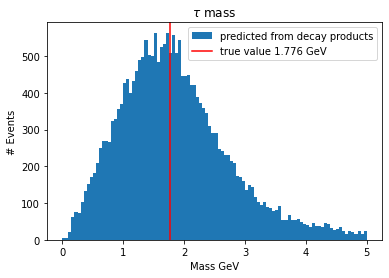

In [45]:
plt.hist(tau_mass_pi_1,bins = 100,range=(0,5),label = 'predicted from decay products')
plt.axvline(x = 1.776, color = 'r',label = 'true value 1.776 GeV')
plt.title('$\\tau$ mass')
plt.xlabel('Mass GeV')
plt.ylabel('# Events')
plt.legend()

# Different methods of computing Acoplanarity Angle in Different Combination of Decay Modes

### Polarimetric Vector Method

In [46]:
def PolarimetricVector(arg,undecayed_tau):
    pv = []
    for i in range(len(undecayed_tau)):
        boost = vector.obj(px=undecayed_tau[i].px/undecayed_tau[i].E,py=undecayed_tau[i].py/undecayed_tau[i].E,pz=undecayed_tau[i].pz/undecayed_tau[i].E)
        if len(arg) == 1:
            ot = arg[0][i].boost_beta3(-boost).to_beta3()
            pv_2 = vector.obj(px=ot.px,py=ot.py,pz=ot.pz,E=0)
            pv_3 = pv_2.boost_beta3(boost)
            pv.append(pv_3)
            
        elif len(arg) == 2:
            pi_d = arg[0][i].boost_beta3(-boost)
            p0_d = arg[1][i].boost_beta3(-boost)
            undecayed_tau_d = undecayed_tau[i].boost_beta3(-boost)

            q = pi_d-p0_d
            P = undecayed_tau_d
            N = undecayed_tau_d-pi_d-p0_d
            pv_1 = P.mass*(2*(q.dot(N))*q.to_beta3() - q.mag2*N.to_beta3())*(1/ (2*(q.dot(N))*(q.dot(P)) - q.mag2*(N.dot(P))))
            pv_2 = vector.obj(px=pv_1.px,py=pv_1.py,pz=pv_1.pz,E=0)
            pv_3 = pv_2.boost_beta3(boost)
            pv.append(pv_3)
        
    return pv

In [47]:
# def IPAcoAngle_pv(pv,undecayed_taus):
#     #pi_p0_1, out_2, pi_pi_1, tau_pi_2):
#     ang = []
#     out = []
#     for i in range(len(undecayed_taus[0])):
#         b = undecayed_taus[0][i]+undecayed_taus[1][i]
#         boost = vector.obj(px=b.px/b.E,py=b.py/b.E,pz=b.pz/b.E)
        
#         l_h1= pv[0]
#         l_h2= pv[1]
#         l_tau_1 = undecayed_taus[0]
#         l_tau_2 = undecayed_taus[1]

#         p1_b = l_h1[i].boost_beta3(-boost)
#         p2_b = l_h2[i].boost_beta3(-boost)

#         p3_b = l_tau_1[i].boost_beta3(-boost)
#         p4_b = l_tau_2[i].boost_beta3(-boost)

#         h1 = p1_b.to_beta3()/p1_b.to_beta3().mag
#         h2 = p2_b.to_beta3()/p2_b.to_beta3().mag

#         n1 = p3_b.to_beta3()/p3_b.to_beta3().mag
#         n2 = p4_b.to_beta3()/p4_b.to_beta3().mag

#         k1 = (h1.cross(n1))/((h1.cross(n1)).mag)
#         k2 = (h2.cross(n2))/((h2.cross(n2)).mag)
        

#         pva = np.arccos(k1.dot(k2))
#         pv_sign = (h1.cross(h2)).dot(n1)
        
#         if pv_sign>0:
#             ang.append(2*np.pi-pva)
#         else: 
#             ang.append(pva)
        
#     return ang

In [48]:
def IPAcoAngle_pv(pv,undecayed_taus):
    #pi_p0_1, out_2, pi_pi_1, tau_pi_2):
    ang = []
    out = []
    for i in range(len(undecayed_taus[0])):
        b = undecayed_taus[0][i]+undecayed_taus[1][i]
        boost = vector.obj(px=b.px/b.E,py=b.py/b.E,pz=b.pz/b.E)
        
        l_h1= pv[0]
        l_h2= pv[1]
        l_tau_1 = undecayed_taus[0]
        l_tau_2 = undecayed_taus[1]

        p1_b = l_h1[i].boost_beta3(-boost)
        p2_b = l_h2[i].boost_beta3(-boost)

        p3_b = l_tau_1[i].boost_beta3(-boost)
        p4_b = l_tau_2[i].boost_beta3(-boost)

        h1 = p1_b.to_beta3()/p1_b.to_beta3().mag
        h2 = p2_b.to_beta3()/p2_b.to_beta3().mag

        n1 = p3_b.to_beta3()/p3_b.to_beta3().mag
        n2 = p4_b.to_beta3()/p4_b.to_beta3().mag

        k1 = (h1.cross(n1))/((h1.cross(n1)).mag)
        k2 = (h2.cross(n2))/((h2.cross(n2)).mag)
        
        pva = np.arccos(k1.dot(k2))
        pv_sign = (h1.cross(h2)).dot(n1)
        

        if pv_sign<0:
            ang.append(2*np.pi-pva)
        else: 
            ang.append(pva)
        
    return ang

In [49]:
## dm_1 = 0 & dm_2 = 0
#PV for pi decayed from leading tau
pv_pi_1 = PolarimetricVector([pi_pi_1],tau_pi_1)
#PV for pi decayed from sub-leading tau
pv_pi_2 = PolarimetricVector([pi_pi_2],tau_pi_2)

## dm_1 = 1 & dm_2 = 1
#PV for rho decayed from leading tau
pv_rho_1 = PolarimetricVector([pi_rho_1,p0_rho_1],tau_rho_1,)
#PV for rho decayed from sub-leading tau
pv_rho_2 = PolarimetricVector([pi_rho_2,p0_rho_2],tau_rho_2)

## dm_1 = 0 & dm_2 = 1
#PV for pi decayed from leading tau
pv_pirho_pi = PolarimetricVector([pi_pi_1_pirho],tau_pi_1_pirho)
#PV for rho decayed from sub-leading tau
pv_pirho_rho = PolarimetricVector([pi_rho_2_pirho,p0_rho_2_pirho],tau_rho_2_pirho)

## dm_1 = 1 & dm_2 = 0
#PV for pi decayed from sub-leading tau
pv_rhopi_pi = PolarimetricVector([pi_pi_2_rhopi],tau_pi_2_rhopi)
#PV for rho decayed from leading tau
pv_rhopi_rho = PolarimetricVector([pi_rho_1_rhopi,p0_rho_1_rhopi],tau_rho_1_rhopi)

## Visible method

In [50]:
def Yrho(pi,pi0,taus):
    y_sign = []
    for i in range(len(taus)):
        E_pi = pi[i].E
        E_pi0 = pi0[i].E
        y = (E_pi-E_pi0)/(E_pi+E_pi0)
        y_sign.append(y)
    return y_sign
    

In [51]:
cp_sign_pirho = Yrho(pi_rho_2_pirho,p0_rho_2_pirho,tau_rho_2_pirho)
cp_sign_rhopi = Yrho(pi_rho_1_rhopi,p0_rho_1_rhopi,tau_rho_1_rhopi)
cp_sign_rho_1 = Yrho(pi_rho_1,p0_rho_1,tau_rho_1)
cp_sign_rho_2 = Yrho(pi_rho_2,p0_rho_2,tau_rho_2)

In [52]:
def IPAcoAngle_vis_pv(ps,undecayed_taus,cp_sign):
    #pi_p0_1, out_2, pi_pi_1, tau_pi_2):
    ang = []
    out = []
    for i in range(len(undecayed_taus[0])):
        b = undecayed_taus[0][i]+undecayed_taus[1][i]
        boost = vector.obj(px=b.px/b.E,py=b.py/b.E,pz=b.pz/b.E)

        l_h1= ps[0]
        l_h2= ps[1]
        l_tau_1 = undecayed_taus[0]
        l_tau_2 = undecayed_taus[1]

        p1_b = l_h1[i].boost_beta3(-boost)
        p2_b = l_h2[i].boost_beta3(-boost)

        p3_b = l_tau_1[i].boost_beta3(-boost)
        p4_b = l_tau_2[i].boost_beta3(-boost)

        n1 = p3_b.to_beta3()/p3_b.to_beta3().mag
        n2 = p4_b.to_beta3()/p4_b.to_beta3().mag
        
        m1 = p1_b - p1_b.dot(n1)*n1
        m2 = p2_b - p2_b.dot(n1)*n1

        m1 = m1.to_beta3()/m1.to_beta3().mag
        m2 = m2.to_beta3()/m2.to_beta3().mag

        pva = np.arccos(m1.dot(m2))
        pv_sign = n2.dot(m1.cross(m2))
        
        if pv_sign>0:
            pva_1 = 2*np.pi-pva
        else: 
            pva_1 = pva
            
        if cp_sign[i]<0:
            if pva_1<np.pi:
                ang.append(pva_1 + np.pi)
            else:
                ang.append(pva_1 - np.pi)
        else:
            ang.append(pva_1)
    return ang

In [53]:
def IPAcoAngle_vis_vis(pv,undecayed_taus,cp_sign_1,cp_sign_2):
    #pi_p0_1, out_2, pi_pi_1, tau_pi_2):
    ang = []
    out = []
    for i in range(len(undecayed_taus[0])):
        b = undecayed_taus[0][i]+undecayed_taus[1][i]
        boost = vector.obj(px=b.px/b.E,py=b.py/b.E,pz=b.pz/b.E)

        l_h1= pv[0]
        l_h2= pv[1]
        l_tau_1 = undecayed_taus[0]
        l_tau_2 = undecayed_taus[1]

        p1_b = l_h1[i].boost_beta3(-boost)
        p2_b = l_h2[i].boost_beta3(-boost)

        p3_b = l_tau_1[i].boost_beta3(-boost)
        p4_b = l_tau_2[i].boost_beta3(-boost)

        n1 = p3_b.to_beta3()/p3_b.to_beta3().mag
        n2 = p4_b.to_beta3()/p4_b.to_beta3().mag
        
        m1 = p1_b - p1_b.dot(n1)*n1
        m2 = p2_b - p2_b.dot(n1)*n1

        m1 = m1.to_beta3()/m1.to_beta3().mag
        m2 = m2.to_beta3()/m2.to_beta3().mag

        pva = np.arccos(m1.dot(m2))
        pv_sign = n2.dot(m1.cross(m2))
        cp_sign = cp_sign_1[i]*cp_sign_2[i]
        
        if pv_sign>0:
            pva_1 = 2*np.pi-pva
        else: 
            pva_1 = pva
            
        if cp_sign<0:
            if pva_1<np.pi:
                ang.append(pva_1 + np.pi)
            else:
                ang.append(pva_1 - np.pi)
        else:
            ang.append(pva_1)
        
    return ang

# Acoangle

In [54]:
## for dm_1 = 0 & dm_2 = 1
# PV+visible
pirho_pv_v = [pv_pirho_pi,rho_pirho_2]
tau_pv_v = [tau_pi_1_pirho,tau_rho_2_pirho]
# pv+pv
tau_pirho = [tau_pi_1_pirho,tau_rho_2_pirho]
pv_pirho = [pv_pirho_pi,pv_pirho_rho]


## dm_1 = 1 & dm_2 = 0
# visible+PV
rhopi_v_pv = [pv_rhopi_pi,rho_rhopi_1]
tau_v_pv = [tau_pi_2_rhopi,tau_rho_1_rhopi]
# PV+PV
tau_rhopi = [tau_rho_1_rhopi,tau_pi_2_rhopi]
pv_rhopi = [pv_rhopi_rho,pv_rhopi_pi]


## dm_1 = 0 & dm_2 = 0
# PV+PV 
pi_pi = [pi_pi_1,pi_pi_2]
tau_pi = [tau_pi_1,tau_pi_2]
pv_pi = [pv_pi_1,pv_pi_2]


## dm_1 = 1 & dm_2 = 1
# PV+PV
pi_rho = [pi_rho_1,pi_rho_2]
p0_rho = [p0_rho_1,p0_rho_2]
tau_rho = [tau_rho_1,tau_rho_2]
pv_rho = [pv_rho_1,pv_rho_2]
# visible+visible
rho_rho = [rho_rho_1,rho_rho_2]

### PV+PV

In [55]:
# decaymode dm_1 = 1 & dm_2 = 1
a = IPAcoAngle_pv(pv_rho,tau_rho)
# decaymode dm_1 = 0 & dm_2 = 0
b = IPAcoAngle_pv(pv_pi,tau_pi)

In [56]:
# decaymode dm_1 = 0 & dm_2 = 1
c_1 = IPAcoAngle_pv(pv_pirho,tau_pirho)
# decaymode dm_1 = 1 & dm_2 = 0
c_2 = IPAcoAngle_pv(pv_rhopi,tau_rhopi)

## visible for $\rho$ + PV for $\pi$

In [57]:
# decaymode dm_1 = 0 & dm_2 = 1
m_1 = IPAcoAngle_vis_pv(pirho_pv_v,tau_pv_v,cp_sign_pirho)
# decaymode dm_1 = 1 & dm_2 = 0
m_2 = IPAcoAngle_vis_pv(rhopi_v_pv,tau_v_pv,cp_sign_rhopi)

### visible +visible

In [59]:
# decaymode dm_1 = 1 & dm_2 = 1
v_r = IPAcoAngle_vis_vis(rho_rho,tau_rho,cp_sign_rho_1,cp_sign_rho_2)

# Plot acoangle distribution and compute corresponding average asymmetry

In [60]:
## select event for each decay mode combination
pis = (df_select['dm_1']==0)&(df_select['dm_2']==0)
rhos = (df_select['dm_1']==1)&(df_select['dm_2']==1)
a1s = (df_select['dm_1']==10)&(df_select['dm_2']==10)

pis_rhos = (df_select['dm_1']==0)&(df_select['dm_2']==1)
rhos_pis = (df_select['dm_1']==1)&(df_select['dm_2']==0)

In [61]:
w_m_1 = X_test_inv_o[(X_test_inv_o['dm_1'] == 0)&(X_test_inv_o['dm_2'] == 1)]
w_m_2 = X_test_inv_o[(X_test_inv_o['dm_1'] == 1)&(X_test_inv_o['dm_2'] == 0)]

w_m_rho = X_test_inv_o[(X_test_inv_o['dm_1'] == 1)&(X_test_inv_o['dm_2'] == 1)]
w_m_pi = X_test_inv_o[(X_test_inv_o['dm_1'] == 0)&(X_test_inv_o['dm_2'] == 0)]

## 1$\pi$ 2$\rho$

In [62]:
# c_1.sort()
# m_1.sort()

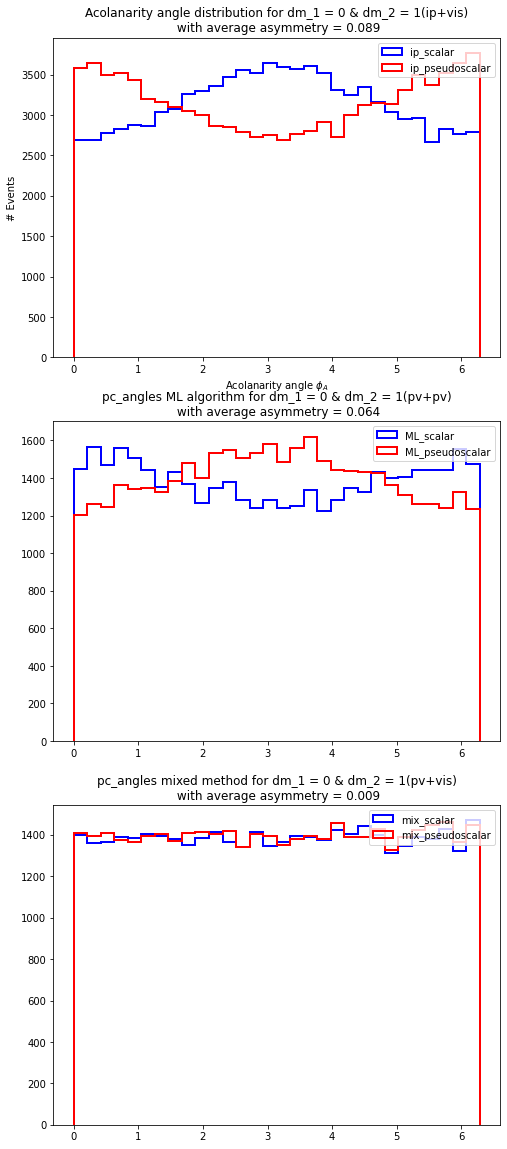

In [63]:
r = (0,2*np.pi)
fig = plt.subplots(figsize=(8,20))
bins = 30

plt.subplot(311)
n_sm_ip_pirho,bins_sm_pirho_ip,p = plt.hist(df_select[pis_rhos]['aco_angle_5'].to_numpy(),bins = bins, color = 'b',range = r,label = 'ip_scalar',weights=df_select[pis_rhos]['wt_cp_sm'],histtype = u'step',lw = 2)#,density=True)
n_ps_ip_pirho,bins_ps_pirho_ip,p = plt.hist(df_select[pis_rhos]['aco_angle_5'].to_numpy(),bins = bins, color = 'r',range = r,label = 'ip_pseudoscalar',weights=df_select[pis_rhos]['wt_cp_ps'],histtype = u'step',lw = 2)#,density=True)
ip_sep_pirho = (1/bins)*(sum(abs(n_sm_ip_pirho-n_ps_ip_pirho)/(n_sm_ip_pirho+n_ps_ip_pirho)))
plt.title('Acolanarity angle distribution for dm_1 = 0 & dm_2 = 1(ip+vis)\n with average asymmetry = {0:.3f}'.format(ip_sep_pirho))
plt.xlabel('Acolanarity angle $\phi_A$')
plt.ylabel('# Events')
plt.legend()

plt.subplot(312)
n_sm_ml_pirho,bins_sm_pirho_ml,p = plt.hist(c_1,bins = bins,color = 'b',range=r,histtype=u'step',lw=2,weights=w_m_1['wt_cp_sm'],label='ML_scalar')
n_ps_ml_pirho,bins_ps_pirho_ml,p = plt.hist(c_1,bins = bins,color = 'r',range=r,histtype=u'step',lw=2,weights=w_m_1['wt_cp_ps'],label='ML_pseudoscalar')
ml_sep_pirho = (1/bins)*(sum(abs(n_sm_ml_pirho-n_ps_ml_pirho)/(n_sm_ml_pirho+n_ps_ml_pirho)))
plt.title('pc_angles ML algorithm for dm_1 = 0 & dm_2 = 1(pv+pv)\n with average asymmetry = {0:.3f}'.format(ml_sep_pirho))
plt.legend()

plt.subplot(313)
n_sm_ml_pirho_new,bins_sm_pirho_ml,p = plt.hist(m_1,bins = bins,color = 'b',range=r,histtype=u'step',lw=2,weights=w_m_1['wt_cp_sm'],label='mix_scalar')
n_ps_ml_pirho_new,bins_ps_pirho_ml,p = plt.hist(m_1,bins = bins,color = 'r',range=r,histtype=u'step',lw=2,weights=w_m_1['wt_cp_ps'],label='mix_pseudoscalar')
mix_sep_pirho = (1/bins)*(sum(abs(n_sm_ml_pirho_new-n_ps_ml_pirho_new)/(n_sm_ml_pirho_new+n_ps_ml_pirho_new)))
plt.title('pc_angles mixed method for dm_1 = 0 & dm_2 = 1(pv+vis)\n with average asymmetry = {0:.3f}'.format(mix_sep_pirho))
plt.legend()

### 1$\rho$ 2$\pi$

In [64]:
# c_2.sort()
# m_2.sort()

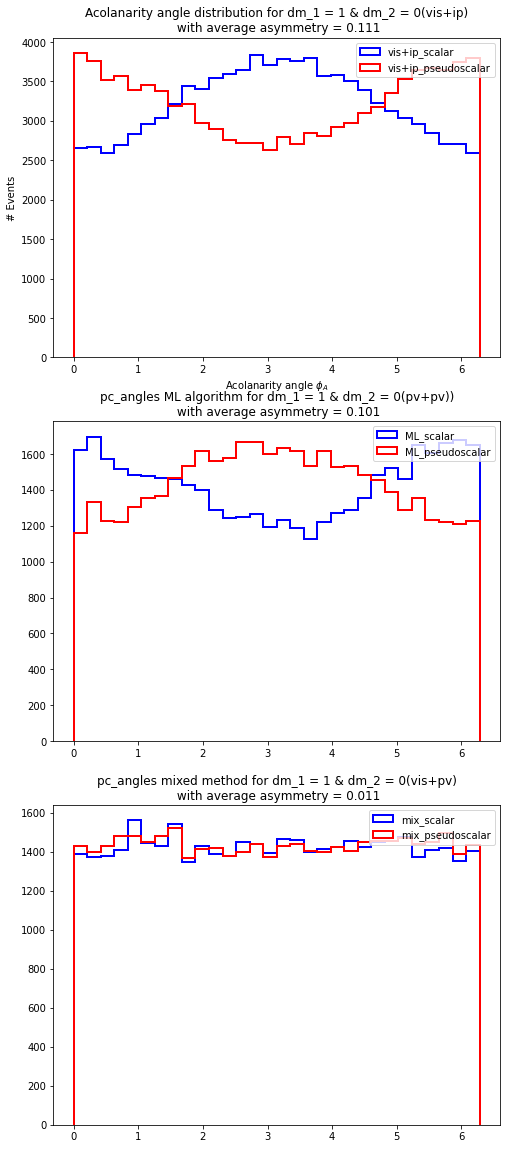

In [65]:
r = (0,2*np.pi)
fig = plt.subplots(figsize=(8,20))
bins = 30

plt.subplot(311)
n_sm_ip_rhopi,bins_sm_rhopi_ip,p = plt.hist(df_select[rhos_pis]['aco_angle_5'].to_numpy(),bins = bins, color = 'b',range = r,label = 'vis+ip_scalar',weights=df_select[rhos_pis]['wt_cp_sm'],histtype = u'step',lw = 2)#,density=True)
n_ps_ip_rhopi,bins_ps_rhopi_ip,p = plt.hist(df_select[rhos_pis]['aco_angle_5'].to_numpy(),bins = bins, color = 'r',range = r,label = 'vis+ip_pseudoscalar',weights=df_select[rhos_pis]['wt_cp_ps'],histtype = u'step',lw = 2)#,density=True)
ip_sep_rhopi = (1/bins)*(sum(abs(n_sm_ip_rhopi-n_ps_ip_rhopi)/(n_sm_ip_rhopi+n_ps_ip_rhopi)))
plt.title('Acolanarity angle distribution for dm_1 = 1 & dm_2 = 0(vis+ip)\n with average asymmetry = {0:.3f}'.format(ip_sep_rhopi))
plt.xlabel('Acolanarity angle $\phi_A$')
plt.ylabel('# Events')
plt.legend()

plt.subplot(312)
n_sm_ml_rhopi,bins_sm_rhopi_ml,p = plt.hist(c_2,bins = bins,color = 'b',range=r,histtype=u'step',lw=2,weights=w_m_2['wt_cp_sm'],label='ML_scalar')
n_ps_ml_rhopi,bins_ps_rhopi_ml,p = plt.hist(c_2,bins = bins,color = 'r',range=r,histtype=u'step',lw=2,weights=w_m_2['wt_cp_ps'],label='ML_pseudoscalar')
ml_sep_rhopi = (1/bins)*(sum(abs(n_sm_ml_rhopi-n_ps_ml_rhopi)/(n_sm_ml_rhopi+n_ps_ml_rhopi)))
plt.title('pc_angles ML algorithm for dm_1 = 1 & dm_2 = 0(pv+pv))\n with average asymmetry = {0:.3f}'.format(ml_sep_rhopi))
plt.legend()

plt.subplot(313)
n_sm_ml_rhopi_new,bins_sm_rhopi_ml,p = plt.hist(m_2,bins = bins,color = 'b',range=r,histtype=u'step',lw=2,weights=w_m_2['wt_cp_sm'],label='mix_scalar')
n_ps_ml_rhopi_new,bins_ps_rhopi_ml,p = plt.hist(m_2,bins = bins,color = 'r',range=r,histtype=u'step',lw=2,weights=w_m_2['wt_cp_ps'],label='mix_pseudoscalar')
mix_sep_rhopi = (1/bins)*(sum(abs(n_sm_ml_rhopi_new-n_ps_ml_rhopi_new)/(n_sm_ml_rhopi_new+n_ps_ml_rhopi_new)))
plt.title('pc_angles mixed method for dm_1 = 1 & dm_2 = 0(vis+pv)\n with average asymmetry = {0:.3f}'.format(mix_sep_rhopi))
plt.legend()

### $\rho$ for boths

In [66]:
# a.sort()
# v_r.sort()

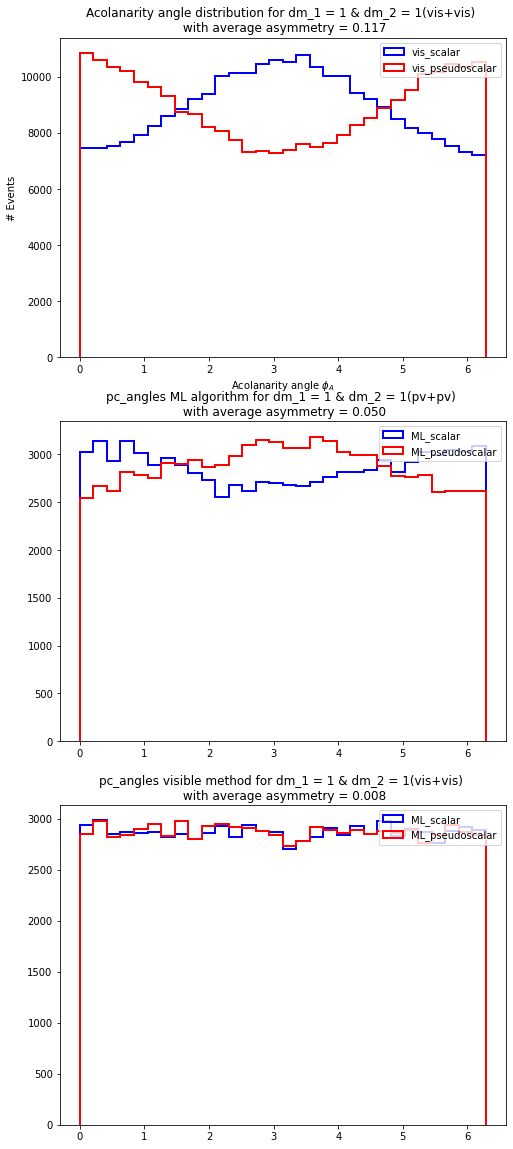

In [67]:
r = (0,2*np.pi)
fig = plt.subplots(figsize=(8,20))
bins = 30

plt.subplot(311)
n_sm_ip_rho,bins_sm_ip,p = plt.hist(df_select[rhos]['aco_angle_1'].to_numpy(),bins = bins,color = 'b', range = r,label = 'vis_scalar',weights=df_select[rhos]['wt_cp_sm'],histtype = u'step',lw = 2)#,density=True)
n_ps_ip_rho,bins_ps_ip,p = plt.hist(df_select[rhos]['aco_angle_1'].to_numpy(),bins = bins,color = 'r', range = r,label = 'vis_pseudoscalar',weights=df_select[rhos]['wt_cp_ps'],histtype = u'step',lw = 2)#,density=True)
ip_sep_rho = (1/bins)*(sum(abs(n_sm_ip_rho-n_ps_ip_rho)/(n_sm_ip_rho+n_ps_ip_rho)))
plt.title('Acolanarity angle distribution for dm_1 = 1 & dm_2 = 1(vis+vis) \n with average asymmetry = {0:.3f}'.format(ip_sep_rho))
plt.xlabel('Acolanarity angle $\phi_A$')
plt.ylabel('# Events')
plt.legend()

plt.subplot(312)
n_sm_ml_rho,bins_sm_ml,p = plt.hist(a,bins = bins,range=r,color = 'b',histtype=u'step',lw=2,weights=w_m_rho['wt_cp_sm'],label='ML_scalar')
n_ps_ml_rho,bins_ps_ml,p = plt.hist(a,bins = bins,range=r,color = 'r',histtype=u'step',lw=2,weights=w_m_rho['wt_cp_ps'],label='ML_pseudoscalar')
ml_sep_rho = (1/bins)*(sum(abs(n_sm_ml_rho-n_ps_ml_rho)/(n_sm_ml_rho+n_ps_ml_rho)))
plt.title('pc_angles ML algorithm for dm_1 = 1 & dm_2 = 1(pv+pv) \n with average asymmetry = {0:.3f}'.format(ml_sep_rho))
plt.legend()

plt.subplot(313)
n_sm_v_rho,bins_sm_v,p = plt.hist(v_r,bins = bins,color = 'b',range=r,histtype=u'step',lw=2,weights=w_m_rho['wt_cp_sm'],label='ML_scalar')
n_ps_v_rho,bins_ps_v,p = plt.hist(v_r,bins = bins,color = 'r',range=r,histtype=u'step',lw=2,weights=w_m_rho['wt_cp_ps'],label='ML_pseudoscalar')
v_sep_rho = (1/bins)*(sum(abs(n_sm_v_rho-n_ps_v_rho)/(n_sm_v_rho+n_ps_v_rho)))
plt.title('pc_angles visible method for dm_1 = 1 & dm_2 = 1(vis+vis) \n with average asymmetry = {0:.3f}'.format(v_sep_rho))
plt.legend()

### $\pi$ for boths

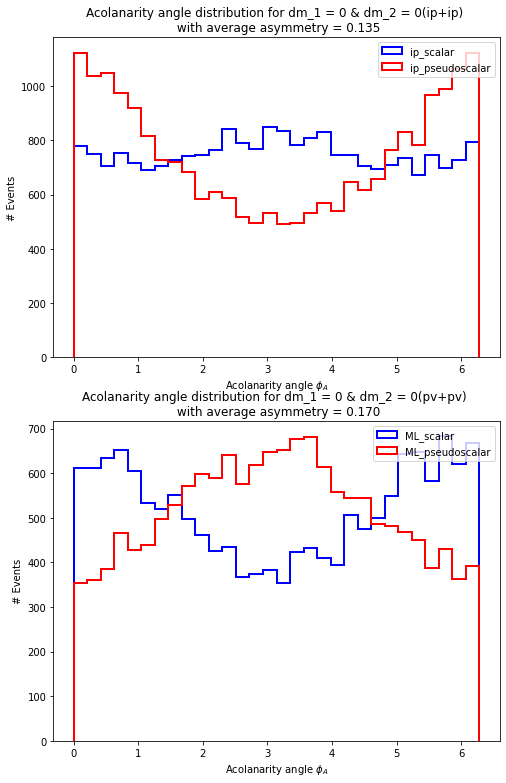

In [68]:
r = (0,2*np.pi)
fig = plt.subplots(figsize=(8,20))
bins = 30

plt.subplot(312)
n_sm_ip_pi,bins_1,p = plt.hist(df_select[pis]['aco_angle_6'].to_numpy(),bins = bins, range = r,label = 'ip_scalar'.format(),weights=df_select[pis]['wt_cp_sm'],histtype = u'step',lw = 2,color = 'b')#,density=True)
n_ps_ip_pi,bins_1,p = plt.hist(df_select[pis]['aco_angle_6'].to_numpy(),bins = bins, range = r,label = 'ip_pseudoscalar',weights=df_select[pis]['wt_cp_ps'],histtype = u'step',lw = 2,color = 'r')#,density=True)
ip_sep_pi = (1/bins)*(sum(abs(n_sm_ip_pi-n_ps_ip_pi)/(n_sm_ip_pi+n_ps_ip_pi)))
plt.title('Acolanarity angle distribution for dm_1 = 0 & dm_2 = 0(ip+ip) \n with average asymmetry = {0:.3f}'.format(ip_sep_pi))
plt.xlabel('Acolanarity angle $\phi_A$')
plt.ylabel('# Events')
plt.legend()

plt.subplot(313)
n_sm_ml_pi,bins_1,p = plt.hist(b,bins = bins,range=r,histtype=u'step',lw=2,weights=w_m_pi['wt_cp_sm'],label='ML_scalar',color = 'b')
n_ps_ml_pi,bins_1,p = plt.hist(b,bins = bins,range=r,histtype=u'step',lw=2,weights=w_m_pi['wt_cp_ps'],label='ML_pseudoscalar',color = 'r')
ml_sep_pi = (1/bins)*(sum(abs(n_sm_ml_pi-n_ps_ml_pi)/(n_sm_ml_pi+n_ps_ml_pi)))
plt.title('Acolanarity angle distribution for dm_1 = 0 & dm_2 = 0(pv+pv) \n with average asymmetry = {0:.3f}'.format(ml_sep_pi))
plt.xlabel('Acolanarity angle $\phi_A$')
plt.ylabel('# Events')
plt.legend()

In [69]:
input_test = X_test.reset_index()

In [70]:
E_1_pred = vector.obj(x=data_pred['gen_nu_px_1'],y=data_pred['gen_nu_py_1'],z=data_pred['gen_nu_pz_1']).mag
E_2_pred = vector.obj(x=data_pred['gen_nu_px_2'],y=data_pred['gen_nu_py_2'],z=data_pred['gen_nu_pz_2']).mag

E_1_true = vector.obj(x=data_true['gen_nu_px_1'],y=data_true['gen_nu_py_1'],z=data_true['gen_nu_pz_1']).mag
E_2_true = vector.obj(x=data_true['gen_nu_px_2'],y=data_true['gen_nu_py_2'],z=data_true['gen_nu_pz_2']).mag

delphi_1 = vector.obj(px=data_pred['gen_nu_px_1'], py=data_pred['gen_nu_py_1'], pz=data_pred['gen_nu_pz_1'], E=E_1_pred).deltaphi(vector.obj(px=data_true['gen_nu_px_1'], py=data_true['gen_nu_py_1'], pz=data_true['gen_nu_pz_1'], E=E_1_true))
delphi_2 = vector.obj(px=data_pred['gen_nu_px_2'], py=data_pred['gen_nu_py_2'], pz=data_pred['gen_nu_pz_2'], E=E_2_pred).deltaphi(vector.obj(px=data_true['gen_nu_px_2'], py=data_true['gen_nu_py_2'], pz=data_true['gen_nu_pz_2'], E=E_2_true))


phi_sv_x_1 = X_test_o['svfit_px_1']-X_test_o['reco_x_1']
phi_sv_y_1 = X_test_o['svfit_py_1']-X_test_o['reco_y_1']
phi_sv_z_1 = X_test_o['svfit_pz_1']-X_test_o['reco_z_1']
phi_sv_E_1 = X_test_o['svfit_E_1']-X_test_o['reco_E_1']

phi_sv_x_2 = X_test_o['svfit_px_2']-X_test_o['reco_x_2']
phi_sv_y_2 = X_test_o['svfit_py_2']-X_test_o['reco_y_2']
phi_sv_z_2 = X_test_o['svfit_pz_2']-X_test_o['reco_z_2']
phi_sv_E_2 = X_test_o['svfit_E_2']-X_test_o['reco_E_2']

delphi_sv_1 = vector.obj(px=phi_sv_x_1, py=phi_sv_y_1, pz=phi_sv_z_1, E=phi_sv_E_1).deltaphi(vector.obj(px=data_true['gen_nu_px_1'], py=data_true['gen_nu_py_1'], pz=data_true['gen_nu_pz_1'], E=E_1_true))
delphi_sv_2 = vector.obj(px=phi_sv_x_2, py=phi_sv_y_2, pz=phi_sv_z_2, E=phi_sv_E_2).deltaphi(vector.obj(px=data_true['gen_nu_px_2'], py=data_true['gen_nu_py_2'], pz=data_true['gen_nu_pz_2'], E=E_2_true))

In [71]:
eta_1 = np.arcsinh(data_pred['gen_nu_pz_1']/np.sqrt(data_pred['gen_nu_py_1']**2+data_pred['gen_nu_px_1']**2))
eta_2 = np.arcsinh(data_pred['gen_nu_pz_2']/np.sqrt(data_pred['gen_nu_py_2']**2+data_pred['gen_nu_px_2']**2))

eta_1_sv = np.arcsinh((X_test_o['svfit_pz_1']-X_test_o['reco_z_1'])/np.sqrt((X_test_o['svfit_py_1']-X_test_o['reco_y_1'])**2+(X_test_o['svfit_px_1']-X_test_o['reco_x_1'])**2))
eta_2_sv = np.arcsinh((X_test_o['svfit_pz_2']-X_test_o['reco_z_2'])/np.sqrt((X_test_o['svfit_py_2']-X_test_o['reco_y_2'])**2+(X_test_o['svfit_px_2']-X_test_o['reco_x_2'])**2))

In [ ]:
[X_test['gen_nu_eta_2'],eta_2]

In [ ]:
from sklearn.metrics import mean_squared_error

rms_eta1_co = np.sqrt(mean_squared_error(eta_1,input_test['gen_nu_eta_1']))
rms_eta1_sv = np.sqrt(mean_squared_error(eta_1_sv,input_test['gen_nu_eta_1']))

rms_eta2_co = np.sqrt(mean_squared_error(eta_2,input_test['gen_nu_eta_2']))
rms_eta2_sv = np.sqrt(mean_squared_error(eta_2_sv,input_test['gen_nu_eta_2']))


MSE_1_co = np.square(delphi_1).mean() 
rms_phi1_co = np.sqrt(MSE_1_co)
MSE_1_sv = np.square(delphi_sv_1).mean()
rms_phi1_sv = np.sqrt(MSE_1_sv)

MSE_2_co = np.square(delphi_2).mean() 
rms_phi2_co = np.sqrt(MSE_2_co)
MSE_2_sv = np.square(delphi_sv_2).mean()
rms_phi2_sv = np.sqrt(MSE_2_sv)

In [ ]:
fig = plt.figure(figsize=(15,12))
ran_2 = (-4,4)
plt.subplot(221)
#phi_1_ml = data_pred['gen_nu_phi_1']-data_true['gen_nu_phi_1'].reset_index()['gen_nu_phi_1']
phi_1_co = delphi_1.iloc[index_name_rho_1]
#phi_1_sv_nu = phi_1_sv-data_true['gen_nu_phi_1']
#plt.hist(phi_1_ml,range=ran_2,histtype=u'step',lw=2,bins=100,label='ML \n rms = {0:0.2}\n mean={1:0.2}'.format(rms_phi1_ml,np.mean(phi_1_ml)))
plt.hist(phi_1_co,range=ran_2,histtype=u'step',lw=2,bins=100,label='co\n rms = {0:0.2}\n mean={1:0.2}'.format(rms_phi1_co,np.mean(delphi_1)))
#plt.hist(delphi_sv_1,range=ran_2,histtype=u'step',lw=2,bins=100,label='svfit\n rms = {0:0.2}\n mean={1:0.2}'.format(rms_phi1_sv,np.mean(delphi_sv_1)))
plt.title('Difference of Estimated nu_phi_1 and true nu_phi_1')
plt.legend()
plt.subplot(222)
#phi_2_ml = data_pred['gen_nu_phi_2']-data_true['gen_nu_phi_2'].reset_index()['gen_nu_phi_2']
#phi_2_co = phi_2-data_true['gen_nu_phi_2'].reset_index()['gen_nu_phi_2']
phi_2_co = delphi_2[index_name_rho_2]
#phi_2_sv_nu = phi_2_sv-data_true['gen_nu_phi_2']
#plt.hist(phi_2_ml,range=ran_2,histtype=u'step',lw=2,bins=100,label='ML \n rms = {0:0.2}\n mean={1:0.2}'.format(rms_phi2_ml,np.mean(phi_2_ml)))
plt.hist(phi_2_co,range=ran_2,histtype=u'step',lw=2,bins=100,label='co\n rms = {0:0.2}\n mean={1:0.2}'.format(rms_phi2_co,np.mean(delphi_2)))
#plt.hist(delphi_sv_2,range=ran_2,histtype=u'step',lw=2,bins=100,label='svfit\n rms = {0:0.2}\n mean={1:0.2}'.format(rms_phi2_sv,np.mean(delphi_sv_2)))
plt.title('Difference of Estimated nu_phi_2 and true nu_phi_2')
plt.legend()

plt.subplot(223)
#eta_1_ml = data_pred['gen_nu_eta_1']-data_true['gen_nu_eta_1'].reset_index()['gen_nu_eta_1']
eta_1_co = eta_1-input_test['gen_nu_eta_1']
eta_1_sv_nu = eta_1_sv.reset_index()[0]-input_test['gen_nu_eta_1']
#plt.hist(phi_1_ml,range=ran_2,histtype=u'step',lw=2,bins=100,label='ML \n rms = {0:0.2}\n mean={1:0.2}'.format(rms_phi1_ml,np.mean(phi_1_ml)))
plt.hist(eta_1_co[index_name_rho_1],range=ran_2,histtype=u'step',lw=2,bins=100,label='co\n rms = {0:0.2}\n mean={1:0.2}'.format(rms_eta1_co,np.mean(eta_1_co)))
#plt.hist(eta_1_sv_nu,range=ran_2,histtype=u'step',lw=2,bins=100,label='svfit\n rms = {0:0.2}\n mean={1:0.2}'.format(rms_eta1_sv,np.mean(eta_1_sv_nu)))
plt.title('Difference of Estimated nu_eta_1 and true nu_eta_1')
plt.legend()
plt.subplot(224)
#eta_2_ml = data_pred['gen_nu_eta_2']-data_true['gen_nu_eta_2'].reset_index()['gen_nu_eta_2']
eta_2_co = eta_2-input_test['gen_nu_eta_2']
eta_2_sv_nu = eta_2_sv.reset_index()[0]-input_test['gen_nu_eta_2']
#plt.hist(phi_2_ml,range=ran_2,histtype=u'step',lw=2,bins=100,label='ML \n rms = {0:0.2}\n mean={1:0.2}'.format(rms_phi2_ml,np.mean(phi_2_ml)))
plt.hist(eta_2_co[index_name_rho_2],range=ran_2,histtype=u'step',lw=2,bins=100,label='co\n rms = {0:0.2}\n mean={1:0.2}'.format(rms_eta2_co,np.mean(eta_2_co)))
#plt.hist(eta_2_sv_nu,range=ran_2,histtype=u'step',lw=2,bins=100,label='svfit\n rms = {0:0.2}\n mean={1:0.2}'.format(rms_eta2_sv,np.mean(eta_2_sv_nu)))
plt.title('Difference of Estimated nu_eta_2 and true nu_eta_2')
plt.legend()

In [ ]:
def cross_p(arg,decaymode):
    a1_vis_px_reco =  X_test_inv_o[arg[0]].iloc[decaymode]
    a1_nu_px_reco =  data_pred[arg[4]].iloc[decaymode]

    a1_vis_py_reco =  X_test_inv_o[arg[1]].iloc[decaymode]
    a1_nu_py_reco =  data_pred[arg[5]].iloc[decaymode]

    a1_vis_pz_reco =  X_test_inv_o[arg[2]].iloc[decaymode]
    a1_nu_pz_reco =  data_pred[arg[6]].iloc[decaymode]

#     a1_vis_E_reco =  X_test_inv_o[arg[3]].iloc[decaymode]
#     a1_nu_E_reco =  data_pred[arg[7]].iloc[decaymode]

    
    mag_vis_r = np.sqrt(abs(-a1_vis_px_reco**2-a1_vis_py_reco**2-a1_vis_pz_reco**2))#+a1_vis_E_reco**2))
    mag_nu_r = np.sqrt(abs(-a1_nu_px_reco**2-a1_nu_py_reco**2-a1_nu_pz_reco**2))#+a1_tau_E_reco**2))
    
    unit_vis_px_reco = a1_vis_px_reco/mag_vis_r
    unit_vis_py_reco = a1_vis_py_reco/mag_vis_r
    unit_vis_pz_reco = a1_vis_pz_reco/mag_vis_r
    #unit_vis_E_reco = a1_vis_E_reco/mag_vis_r
    unit_nu_px_reco = a1_nu_px_reco/mag_nu_r
    unit_nu_py_reco = a1_nu_py_reco/mag_nu_r
    unit_nu_pz_reco = a1_nu_pz_reco/mag_nu_r
    #unit_tau_E_reco = a1_tau_E_reco/mag_tau_r
    

    cross_reco = vector.obj(x=unit_vis_px_reco, y=unit_vis_py_reco, z=unit_vis_pz_reco).cross(vector.obj(x=unit_nu_px_reco, y=unit_nu_py_reco, z=unit_nu_pz_reco))


    a1_vis_px_gen = df_select[arg[8]].iloc[decaymode]
    a1_nu_px_gen = df_select[arg[4]].iloc[decaymode]

    a1_vis_py_gen = df_select[arg[9]].iloc[decaymode]
    a1_nu_py_gen = df_select[arg[5]].iloc[decaymode]

    a1_vis_pz_gen = df_select[arg[10]].iloc[decaymode]
    a1_nu_pz_gen = df_select[arg[6]].iloc[decaymode]

#     a1_vis_E_gen = df_select[arg[11]].iloc[decaymode]
#     a1_nu_E_gen = df_select[arg[7]].iloc[decaymode]

    mag_vis_g = np.sqrt(abs(-a1_vis_px_gen**2-a1_vis_py_gen**2-a1_vis_pz_gen**2))#+a1_vis_E_gen**2))
    mag_nu_g = np.sqrt(abs(-a1_nu_px_gen**2-a1_nu_py_gen**2-a1_nu_pz_gen**2))#+a1_tau_E_gen**2))

    unit_vis_px_gen = a1_vis_px_gen/mag_vis_g
    unit_vis_py_gen = a1_vis_py_gen/mag_vis_g
    unit_vis_pz_gen = a1_vis_pz_gen/mag_vis_g
    #unit_vis_E_gen = a1_vis_E_gen/mag_vis_g
    unit_nu_px_gen = a1_nu_px_gen/mag_nu_g
    unit_nu_py_gen = a1_nu_py_gen/mag_nu_g
    unit_nu_pz_gen = a1_nu_pz_gen/mag_nu_g
    #unit_tau_E_gen = a1_tau_E_gen/mag_tau_g

    cross_gen = vector.obj(x=unit_vis_px_gen, y=unit_vis_py_gen, z=unit_vis_pz_gen).cross(vector.obj(x=unit_nu_px_gen, y=unit_nu_py_gen, z=unit_nu_pz_gen))
    return cross_reco,cross_gen

In [ ]:
def sca_p(arg,decaymode):
    a1_vis_px_reco = X_test_inv_o[arg[0]].iloc[decaymode]
    a1_nu_px_reco = data_pred[arg[4]].iloc[decaymode]

    a1_vis_py_reco = X_test_inv_o[arg[1]].iloc[decaymode]
    a1_nu_py_reco = data_pred[arg[5]].iloc[decaymode]

    a1_vis_pz_reco = X_test_inv_o[arg[2]].iloc[decaymode]
    a1_nu_pz_reco = data_pred[arg[6]].iloc[decaymode]

#     a1_vis_E_reco = X_test_inv_o[arg[3]].iloc[decaymode]
#     a1_nu_E_reco = data_pred[arg[7]].iloc[decaymode]
    
    mag_vis_r = np.sqrt(abs(-a1_vis_px_reco**2-a1_vis_py_reco**2-a1_vis_pz_reco**2))#+a1_vis_E_reco**2))
    mag_nu_r = np.sqrt(abs(-a1_nu_px_reco**2-a1_nu_py_reco**2-a1_nu_pz_reco**2))#+a1_nu_E_reco**2))

    unit_vis_px_reco = a1_vis_px_reco/mag_vis_r
    unit_vis_py_reco = a1_vis_py_reco/mag_vis_r
    unit_vis_pz_reco = a1_vis_pz_reco/mag_vis_r
    #unit_vis_E_reco = a1_vis_E_reco/mag_vis_r
    unit_nu_px_reco = a1_nu_px_reco/mag_nu_r
    unit_nu_py_reco = a1_nu_py_reco/mag_nu_r
    unit_nu_pz_reco = a1_nu_pz_reco/mag_nu_r
    #unit_nu_E_reco = a1_nu_E_reco/mag_nu_r
    
    sca_reco = vector.obj(x=unit_vis_px_reco, y=unit_vis_py_reco, z=unit_vis_pz_reco).dot(vector.obj(x=unit_nu_px_reco, y=unit_nu_py_reco, z=unit_nu_pz_reco))
    #sca_reco = np.sqrt(abs(-unit_vis_px_reco*unit_nu_px_reco-unit_vis_py_reco*unit_nu_py_reco-unit_vis_pz_reco*unit_nu_pz_reco+unit_vis_E_reco*unit_nu_E_reco))


    a1_vis_px_gen = df_select[arg[8]].iloc[decaymode]
    a1_nu_px_gen = df_select[arg[4]].iloc[decaymode]

    a1_vis_py_gen = df_select[arg[9]].iloc[decaymode]
    a1_nu_py_gen = df_select[arg[5]].iloc[decaymode]

    a1_vis_pz_gen = df_select[arg[10]].iloc[decaymode]
    a1_nu_pz_gen = df_select[arg[6]].iloc[decaymode]

#     a1_vis_E_gen = df_select[arg[11]].iloc[decaymode]
#     a1_nu_E_gen = df_select[arg[7]].iloc[decaymode]
    
    mag_vis_g = np.sqrt(abs(-a1_vis_px_gen**2-a1_vis_py_gen**2-a1_vis_pz_gen**2))#+a1_vis_E_gen**2))
    mag_nu_g = np.sqrt(abs(-a1_nu_px_gen**2-a1_nu_py_gen**2-a1_nu_pz_gen**2))#+a1_nu_E_gen**2))

    unit_vis_px_gen = a1_vis_px_gen/mag_vis_g
    unit_vis_py_gen = a1_vis_py_gen/mag_vis_g
    unit_vis_pz_gen = a1_vis_pz_gen/mag_vis_g
    #unit_vis_E_gen = a1_vis_E_gen/mag_vis_g
    unit_nu_px_gen = a1_nu_px_gen/mag_nu_g
    unit_nu_py_gen = a1_nu_py_gen/mag_nu_g
    unit_nu_pz_gen = a1_nu_pz_gen/mag_nu_g
    #unit_nu_E_gen = a1_nu_E_gen/mag_nu_g
    
    sca_gen = vector.obj(x=unit_vis_px_gen, y=unit_vis_py_gen, z=unit_vis_pz_gen).dot(vector.obj(x=unit_nu_px_gen, y=unit_nu_py_gen, z=unit_nu_pz_gen))
    #sca_gen = np.sqrt(abs(-unit_vis_px_gen*unit_nu_px_gen-unit_vis_py_gen*unit_nu_py_gen-unit_vis_pz_gen*unit_nu_pz_gen+unit_vis_E_gen*unit_nu_E_gen))
    return sca_reco,sca_gen

In [ ]:
class Cross_products:
    def __init__(self,arg,decaymode,tau,decay):
        self.decaymode = decaymode
        self.cross_reco,self.cross_gen = cross_p(arg,decaymode)
        self.sca_reco,self.sca_gen = sca_p(arg,decaymode)
        self.tau = tau
        self.decay = decay
    
    
    
    
    def plot_cross_p_components(self):
        r_1 = (-1,1)
#         df_reco['x']= pd.DataFrame(self.cross_reco.px)
#         df_reco = df_reco.dropna()
#         df_gen['x']= pd.DataFrame(self.cross_gen.px)
#         df_gen = df_gen.dropna()
        fig = plt.figure(figsize=(7,18))
        plt.subplot(311)
        plt.hist(self.cross_gen.x,bins=100,range=r_1,histtype=u'step',lw=2,label='gen')
        plt.hist(self.cross_reco.x,bins=100,range=r_1,histtype=u'step',lw=2,label='reco')
        plt.title('{1} tau {0} decay x component'.format(self.decay,self.tau))
        plt.legend()
        plt.subplot(312)
        plt.hist(self.cross_gen.y,bins=100,range=r_1,histtype=u'step',lw=2,label='gen')
        plt.hist(self.cross_reco.y,bins=100,range=r_1,histtype=u'step',lw=2,label='reco')
        plt.title('{1} tau {0} decay y component'.format(self.decay,self.tau))
        plt.legend()
        plt.subplot(313)
        plt.hist(self.cross_gen.z,bins=100,range=r_1,histtype=u'step',lw=2,label='gen')
        plt.hist(self.cross_reco.z,bins=100,range=r_1,histtype=u'step',lw=2,label='reco')
        plt.title('{1} tau {0} decay z component'.format(self.decay,self.tau))
        plt.legend()
        
    def plot_sca_p_components(self):
        r_2 = (0.99,1)
#         df_reco['x']= pd.DataFrame(self.cross_reco.px)
#         df_reco = df_reco.dropna()
#         df_gen['x']= pd.DataFrame(self.cross_gen.px)
#         df_gen = df_gen.dropna()
        plt.hist(self.sca_gen,bins=100,range=r_2,histtype=u'step',lw=2,label='gen')
        plt.hist(self.sca_reco,bins=100,range=r_2,histtype=u'step',lw=2,label='reco')
        plt.title('{1} tau {0} decay scalar product (between visibles and neutrinos)'.format(self.decay,self.tau))
        plt.legend()

        
    def delta_cross_p(self):
#         rms_x_ml = np.sqrt(mean_squared_error(self.cross_gen.px,self.cross_reco.px)
#         rms_y_ml = np.sqrt(mean_squared_error(self.cross_gen.py,self.cross_reco.py))
#         rms_z_ml = np.sqrt(mean_squared_error(self.cross_gen.pz,self.cross_reco.pz))
        r_3 = (-1,1)
        fig = plt.figure(figsize=(7,18))
        dif_cross_px = self.cross_gen.x-self.cross_reco.x
        dif_cross_px_c = [x for x in dif_cross_px if abs(x)<500]
        dif_cross_py = self.cross_gen.y-self.cross_reco.y
        dif_cross_py_c = [x for x in dif_cross_py if abs(x)<500]
        dif_cross_pz = self.cross_gen.z-self.cross_reco.z
        dif_cross_pz_c = [x for x in dif_cross_pz if abs(x)<500]
        

        plt.subplot(311)
        plt.hist(dif_cross_px,bins=100,range=r_3,histtype=u'step',lw=2,label='difference\n std = {0:0.2}\n mean={1:0.2}'.format(np.std(dif_cross_px_c),np.mean(dif_cross_px)))
        plt.title('difference of Gen and Reco {0} tau {1} decay x component'.format(self.tau,self.decay))
        plt.legend()
        plt.subplot(312)
        plt.hist(dif_cross_py,bins=100,range=r_3,histtype=u'step',lw=2,label='difference\n std = {0:0.2}\n mean={1:0.2}'.format(np.std(dif_cross_py_c),np.mean(dif_cross_py)))
        plt.title('difference of Gen and Reco {0} tau {1} decay y component '.format(self.tau,self.decay))
        plt.legend()
        plt.subplot(313)
        plt.hist(dif_cross_pz,bins=100,range=r_3,histtype=u'step',lw=2,label='difference\n std = {0:0.2}\n mean={1:0.2}'.format(np.std(dif_cross_pz_c),np.mean(dif_cross_pz)))
        plt.title('difference of Gen and Reco {0} tau {1} decay z component '.format(self.tau,self.decay))
        plt.legend()
        
    def delta_scalar_p(self):
        r_4 = (-1,1)
#         rms_x_ml = np.sqrt(mean_squared_error(self.cross_gen.px,self.cross_reco.px))
#         rms_y_ml = np.sqrt(mean_squared_error(self.cross_gen.py,self.cross_reco.py))
#         rms_z_ml = np.sqrt(mean_squared_error(self.cross_gen.pz,self.cross_reco.pz))
        dif_scalar = self.sca_gen-self.sca_reco
        dif_scalar_c = [x for x in dif_scalar if abs(x)<500]
        plt.hist(dif_scalar,bins=100,range=r_4,histtype=u'step',lw=2,label='difference\n std = {0:0.2}\n mean={1:0.2}'.format(np.std(dif_scalar_c),np.mean(dif_scalar)))
        plt.title('difference of Gen and Reco {0} tau {1} decay scalar product \n (visible and neutrinos)'.format(self.tau,self.decay))
        plt.legend()


In [ ]:
cross_a1_1 = Cross_products(var_1,index_name_a1_1,'leading','a1')
cross_rho_1 = Cross_products(var_1,index_name_rho_1,'leading','rho')
cross_pi_1 = Cross_products(var_1,index_name_pi_1,'leading','pi')

cross_a1_2 = Cross_products(var_2,index_name_a1_2,'sub-leading','a1')
cross_rho_2 = Cross_products(var_2,index_name_rho_2,'sub-leading','rho')
cross_pi_2 = Cross_products(var_2,index_name_pi_2,'sub-leading','pi')

In [ ]:
cross_pi_2.plot_cross_p_components()

In [ ]:
cross_pi_1.plot_sca_p_components()

In [ ]:
cross_pi_2.plot_sca_p_components()

In [ ]:
cross_rho_1.plot_sca_p_components()

In [ ]:
cross_rho_2.plot_sca_p_components()

In [ ]:
def four_vectors_pi_decay_pred(arg,decaymode):
    pi_px =  X_test_inv_o[decaymode][arg[0]].values
    nu_px =  data_pred[decaymode][arg[4]].values
    tau_px = pi_px+nu_px

    pi_py =  X_test_inv_o[decaymode][arg[1]].values
    #p0_py = pd.DataFrame(X_test_inv_o[arg[9]].iloc[decaymode]).values
    nu_py =  data_pred[decaymode][arg[5]].values
    tau_py = pi_py+nu_py

    pi_pz =  X_test_inv_o[decaymode][arg[2]].values
    #p0_pz = pd.DataFrame(X_test_inv_o[arg[10]].iloc[decaymode]).values
    nu_pz =  data_pred[decaymode][arg[6]].values
    tau_pz = pi_pz+nu_pz
    
    pi_E = X_test_inv_o[decaymode][arg[3]].values
    #p0_E = pd.DataFrame(X_test_inv_o[arg[11]].iloc[decaymode]).values
    nu_E = vector.obj(x=nu_px, y=nu_py, z=nu_pz).mag
    tau_E = pi_E+nu_E
    
    
    pis = []
    #p0s = []
    nus = []
    tau = []
    for i in range(len(pi_px)):
        a = vector.obj(x = np.float64(pi_px[i]), y = np.float64(pi_py[i]), z = np.float64(pi_pz[i]), E = np.float64(pi_E[i]))
        #b = vector.obj(x = float(p0_px[i]), y = float(p0_py[i]), z = float(p0_pz[i]), E = float(p0_E[i]))
        c = vector.obj(x = np.float64(nu_px[i]), y = np.float64(nu_py[i]), z = np.float64(nu_pz[i]), E = np.float64(nu_E[i]))
        d = vector.obj(x = np.float64(tau_px[i]), y = np.float64(tau_py[i]), z = np.float64(tau_pz[i]), E = np.float64(tau_E[i]))
        pis.append(a)
        #p0s.append(b)
        nus.append(c)
        tau.append(d)
    
    return pis, nus, tau

In [ ]:
def four_vectors_pi_decay_true(arg,decaymode):
    pi_px =  X_test_inv_o[decaymode][arg[0]].values
    nu_px =  data_true[decaymode][arg[4]].values
    tau_px = pi_px+nu_px

    pi_py =  X_test_inv_o[decaymode][arg[1]].values
    #p0_py = pd.DataFrame(X_test_inv_o[arg[9]].iloc[decaymode]).values
    nu_py =  data_true[decaymode][arg[5]].values
    tau_py = pi_py+nu_py

    pi_pz =  X_test_inv_o[decaymode][arg[2]].values
    #p0_pz = pd.DataFrame(X_test_inv_o[arg[10]].iloc[decaymode]).values
    nu_pz =  data_true[decaymode][arg[6]].values
    tau_pz = pi_pz+nu_pz
    
    pi_E = X_test_inv_o[decaymode][arg[3]].values
    #p0_E = pd.DataFrame(X_test_inv_o[arg[11]].iloc[decaymode]).values
    nu_E = vector.obj(x=nu_px, y=nu_py, z=nu_pz).mag
    tau_E = pi_E+nu_E
    
    
    pis = []
    #p0s = []
    nus = []
    tau = []
    for i in range(len(pi_px)):
        a = vector.obj(x = np.float64(pi_px[i]), y = np.float64(pi_py[i]), z = np.float64(pi_pz[i]), E = np.float64(pi_E[i]))
        #b = vector.obj(x = float(p0_px[i]), y = float(p0_py[i]), z = float(p0_pz[i]), E = float(p0_E[i]))
        c = vector.obj(x = np.float64(nu_px[i]), y = np.float64(nu_py[i]), z = np.float64(nu_pz[i]), E = np.float64(nu_E[i]))
        d = vector.obj(x = np.float64(tau_px[i]), y = np.float64(tau_py[i]), z = np.float64(tau_pz[i]), E = np.float64(tau_E[i]))
        pis.append(a)
        #p0s.append(b)
        nus.append(c)
        tau.append(d)
    
    return pis, nus, tau

In [ ]:
pi_pi_1_p,nu_pi_1_p,tau_pi_1_p = four_vectors_pi_decay_pred(var_pv_pi_1,index_name_pi)
pi_pi_2_p,nu_pi_2_p,tau_pi_2_p = four_vectors_pi_decay_pred(var_pv_pi_2,index_name_pi)

pi_pi_1_t,nu_pi_1_t,tau_pi_1_t = four_vectors_pi_decay_true(var_pv_pi_1,index_name_pi)
pi_pi_2_t,nu_pi_2_t,tau_pi_2_t = four_vectors_pi_decay_true(var_pv_pi_2,index_name_pi)

In [ ]:
delR_p = []
delR_t = []

for k in range(len(pi_pi_1_p)):
    d_p = pi_pi_1_p[k].deltaR(nu_pi_1_p[k])
    d_t = pi_pi_1_t[k].deltaR(nu_pi_1_t[k])
    delR_p.append(d_p)
    delR_t.append(d_t)

In [ ]:
r_r = (0.,0.6)
plt.hist(delR_p,bins=100,range=r_r,histtype=u'step',lw=2,label='prediction')
plt.hist(delR_t,bins=100,range=r_r,histtype=u'step',lw=2,label='true')
plt.xlabel('$\Delta$R')
plt.legend()